<a href="https://colab.research.google.com/github/MatheusABomfim/Mest_MBL2_ML_HTLV/blob/main/MEST_HTLV%2BMBL2%2BCLINICAL_XAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading data and packages**

**Packages install**

In [ ]:
# Att Scikit-learn
!pip install scikit-learn==1.0.2

# Install shap
!pip install shap

**Libraries import**

In [ ]:
# Import data and packages for work:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, recall_score, accuracy_score,roc_curve, auc, make_scorer, precision_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
import pandas as pd
from scipy.stats import skew, kurtosis
import shutil
import os
from sklearn.inspection import permutation_importance
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import warnings
from joblib import load
import shap

warnings.filterwarnings('ignore')

# ipywidgets imports
from ipywidgets import interact, widgets

**Data import**

In [ ]:
# Data selection
cat_data_3k8 = ('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/Data sets and Models/df_cat_3_k8_processed.csv')
cat_data_2k8 = ('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/Data sets and Models/df_cat_2_k8_processed.csv')
# Defining a global variable to store the DataFrame
df = pd.DataFrame()

# Function to load and process the selected dataset
def load_and_process_data(selected_data):
    global df
    if selected_data == 'Categorização 2 (8 melhores variáveis)':
        df = pd.read_table(cat_data_3k8, sep=',')
    elif selected_data == 'Categorização 3 (8 melhores variáveis)':
        df = pd.read_table(cat_data_2k8, sep=',')
    else:
        df = pd.DataFrame()

    print("Data Loaded and Processed Successfully!")
    return df.head()

# List of dataset options
data_options = ['Categorização 2 (8 melhores variáveis)', 'Categorização 3 (8 melhores variáveis)']

# Selection widget to choose the data set
data_selector = widgets.Dropdown(
    options=data_options,
    description='Select Data:'
)

# Interactive function to load and process the selected data set
@interact(selected_data=data_selector)
def load_and_process_selected_data(selected_data):
    return load_and_process_data(selected_data)


interactive(children=(Dropdown(description='Select Data:', options=('Categorização 2 (8 melhores variáveis)', …

**Load models**

In [ ]:
# List of model names that have been adjusted
model_names = ['DT', 'GB', 'LR', 'MLP', 'NB', 'RF', 'SVM', 'KNN', 'AdaBoost', 'LSVM']

# List of model names to match model_names
names = [
    'Decision Tree',
    'Gradient Boosting',
    'Logistic Regression',
    'Neural Network',
    'Naive Bayes',
    'Random Forest',
    'SVM',
    'Nearest Neighbors',
    'AdaBoost',
    'Linear DA',
]

# Directory where models and results are saved
model_dir = '/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Pós-qualificação/Modelos otimizados/ cat_2k8'

# List for storing uploaded templates
classifiers = []

# Function for loading templates
def load_model(model_name):
    model_path = os.path.join(model_dir, f'best_{model_name}_model.joblib')

    if os.path.exists(model_path):

        model = load(model_path)

        classifiers.append(model)

        print(f'Modelo {model_name} carregado com sucesso.')
    else:
        print(f'Arquivo para o modelo {model_name} não encontrado.')

# Iterate over all model names and load them
for model_name in model_names:
    load_model(model_name)

y = df['HAM/TSP']
X = df.drop('HAM/TSP', axis=1)

Modelo DT carregado com sucesso.
Modelo GB carregado com sucesso.
Modelo LR carregado com sucesso.
Modelo MLP carregado com sucesso.
Modelo NB carregado com sucesso.
Modelo RF carregado com sucesso.
Modelo SVM carregado com sucesso.
Modelo KNN carregado com sucesso.
Modelo AdaBoost carregado com sucesso.
Modelo LSVM carregado com sucesso.


# **Evaluation by XAI (Explainable Artificial Intelligence)**

**Permutation importance**

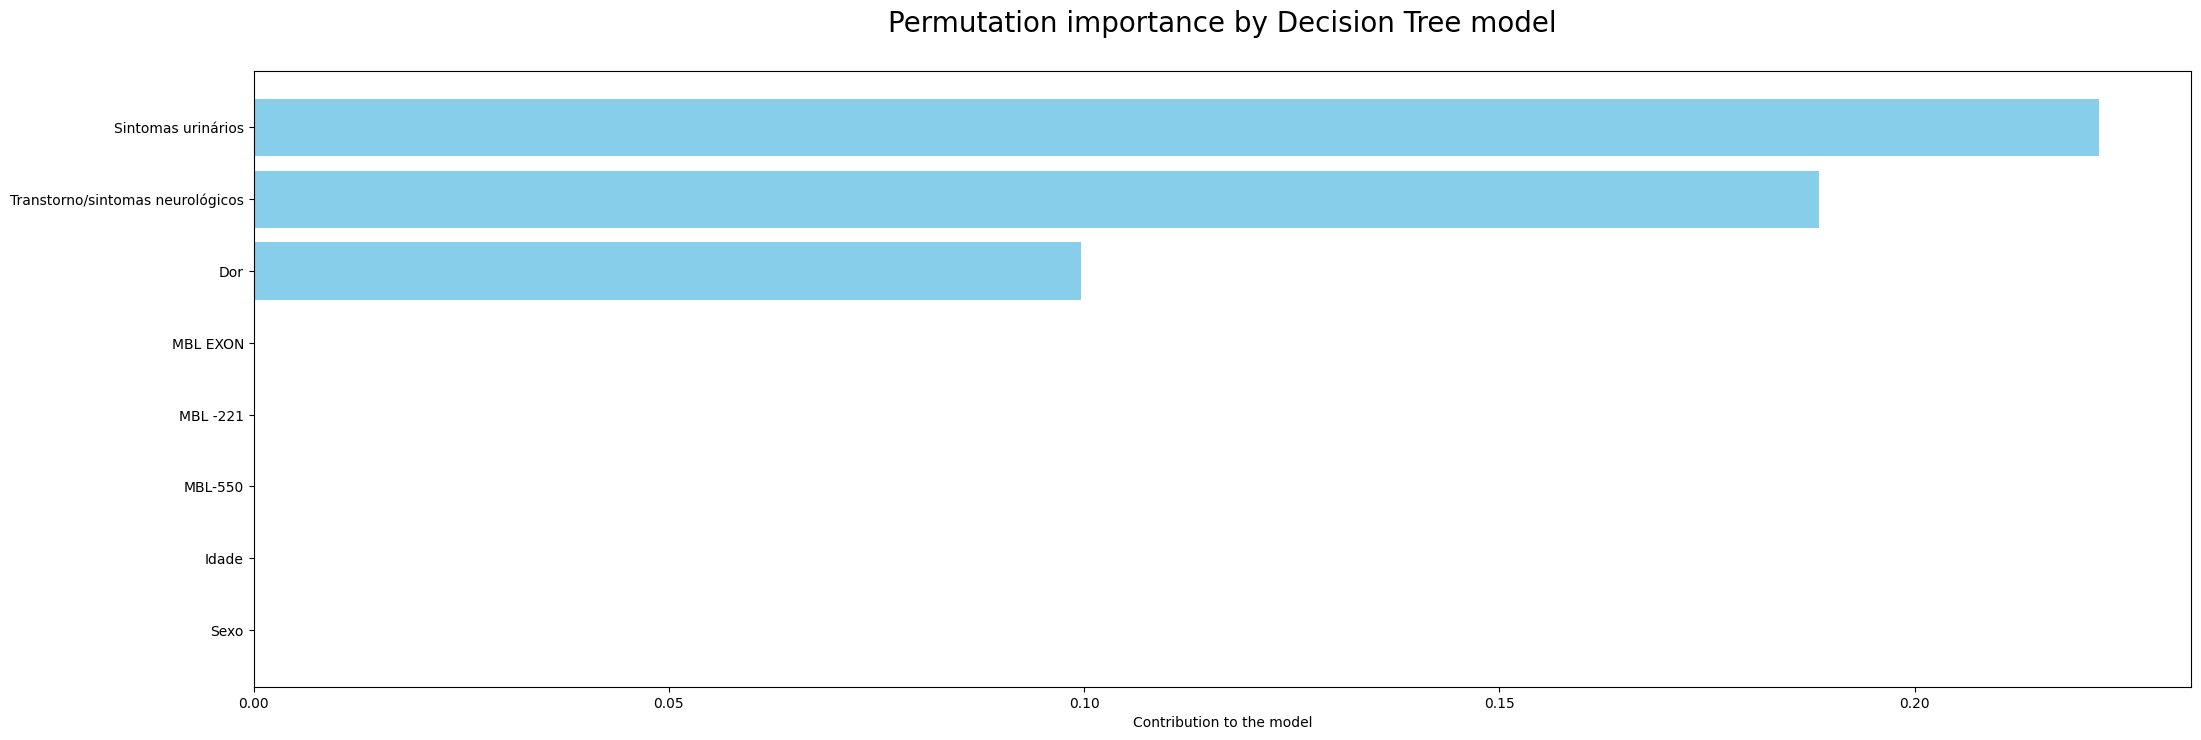

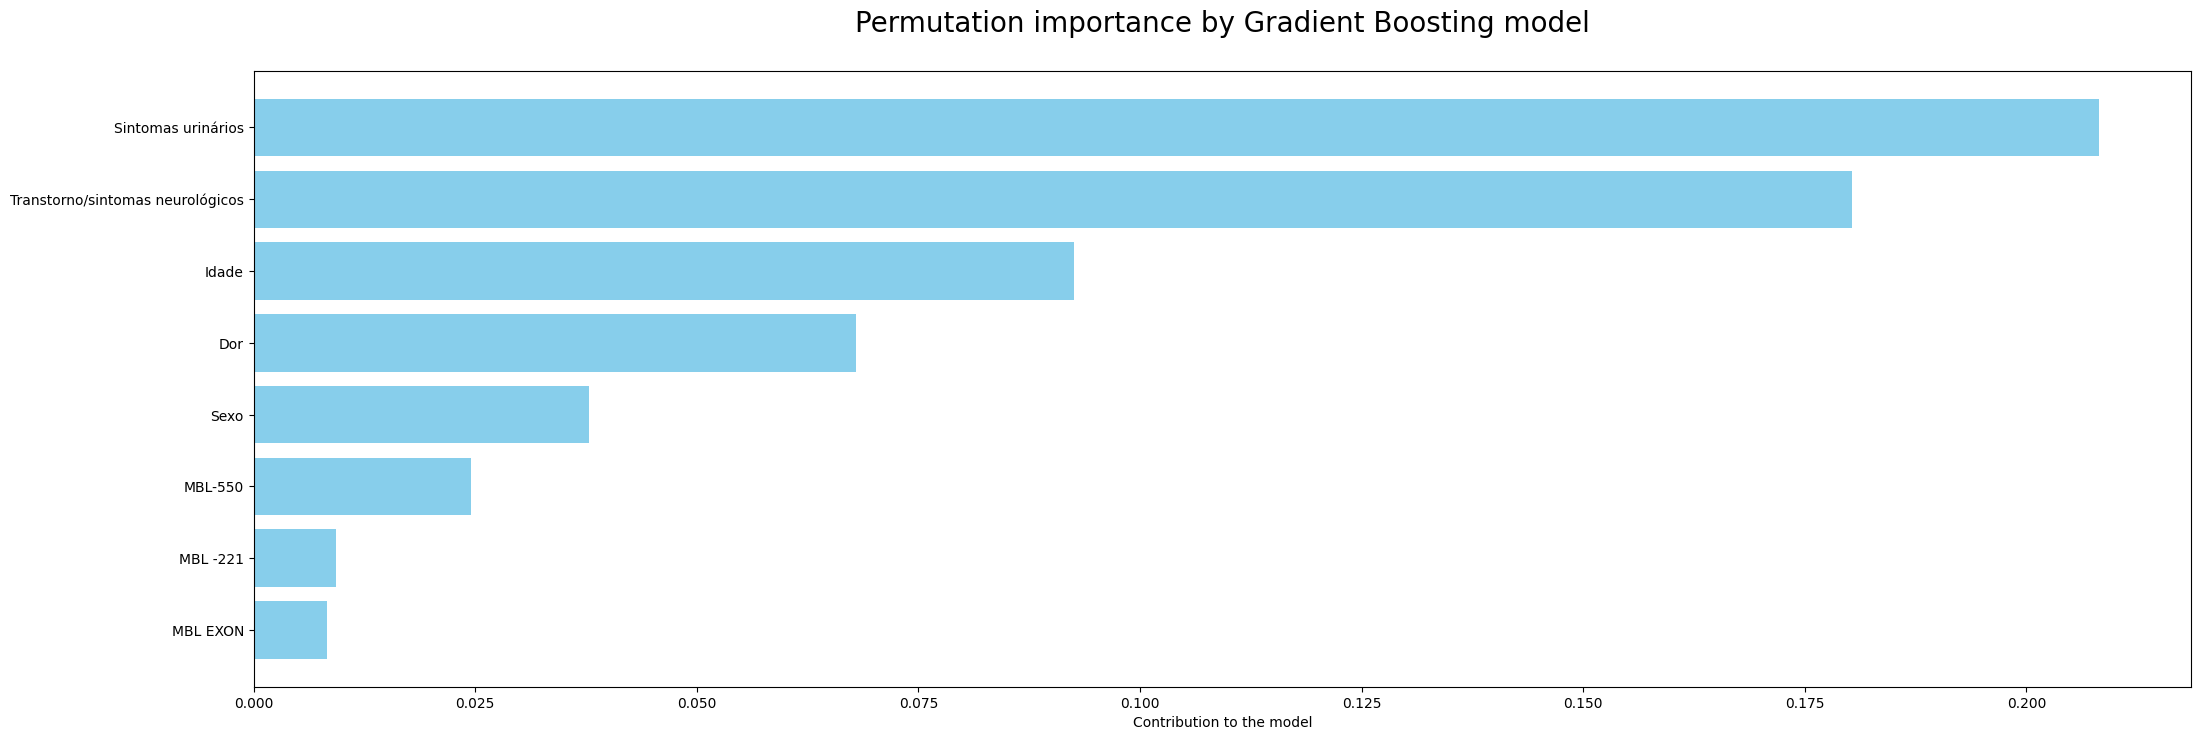

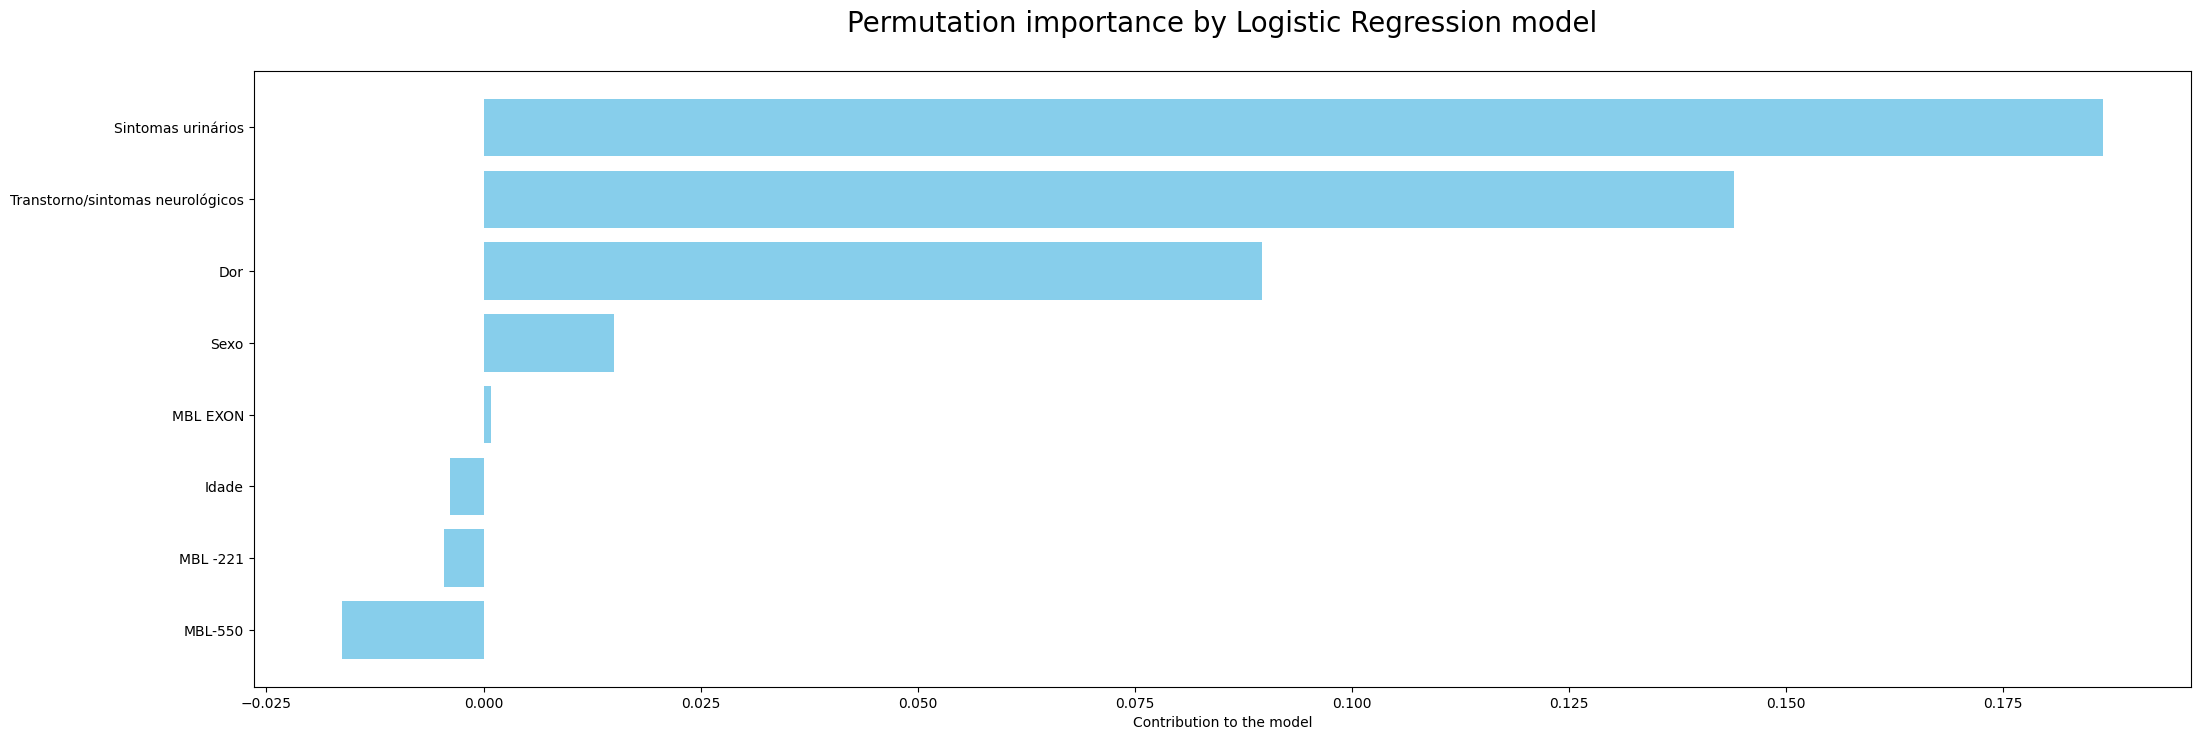

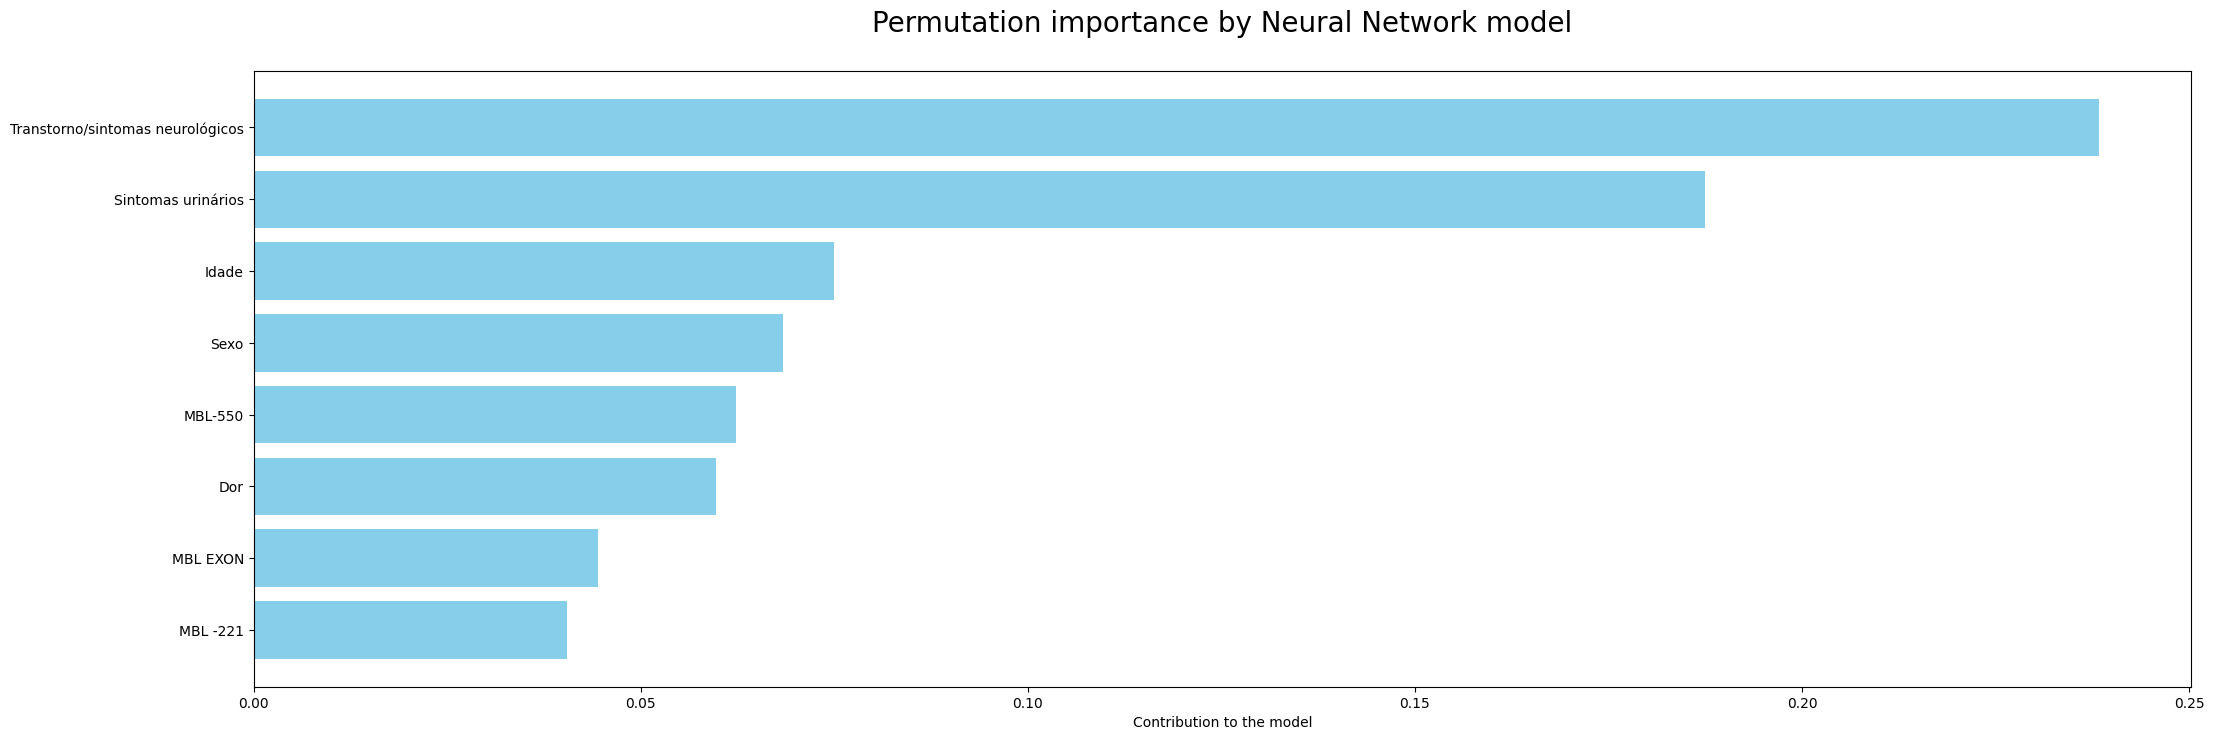

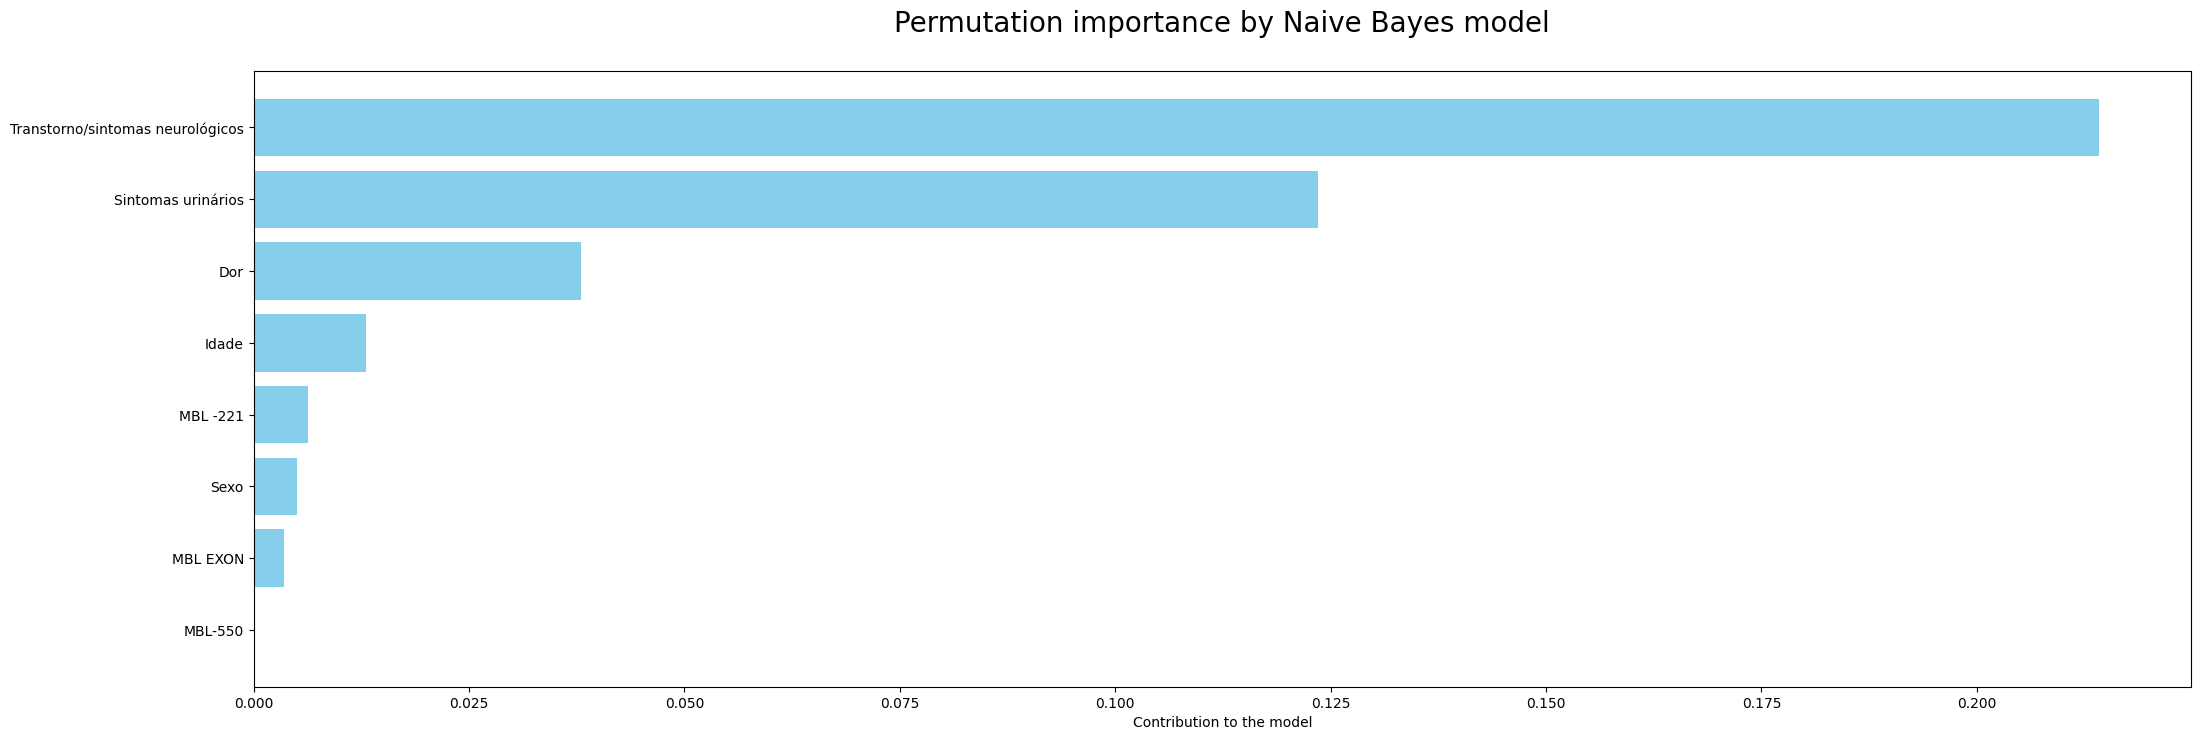

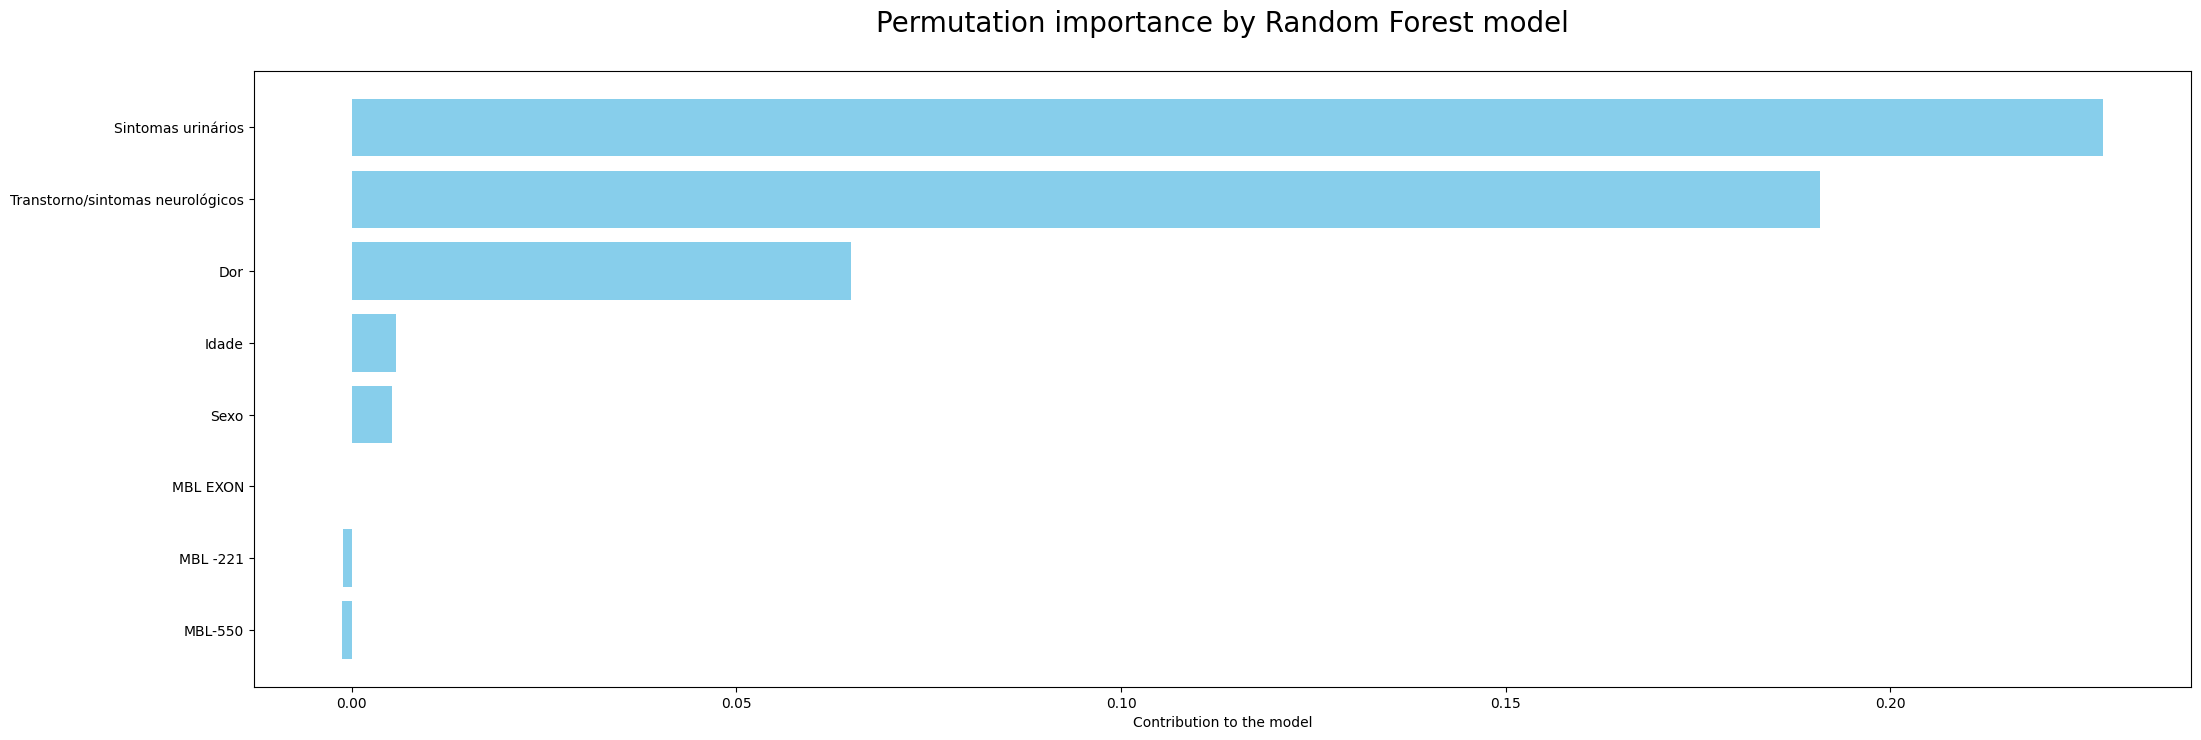

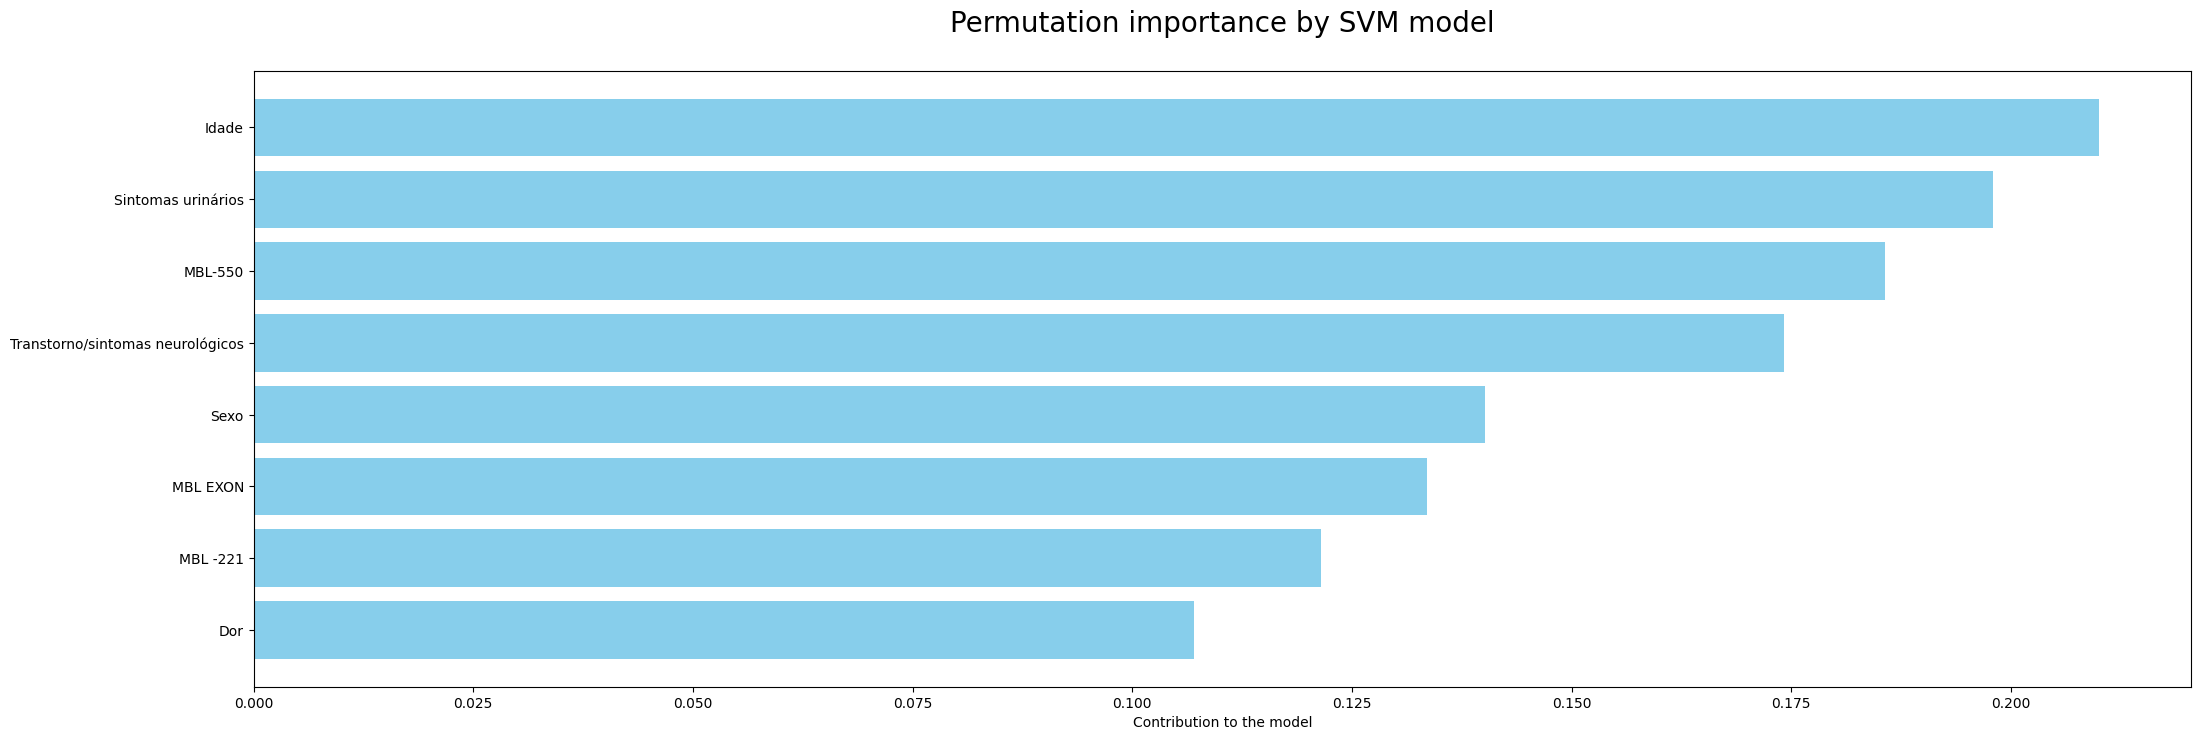

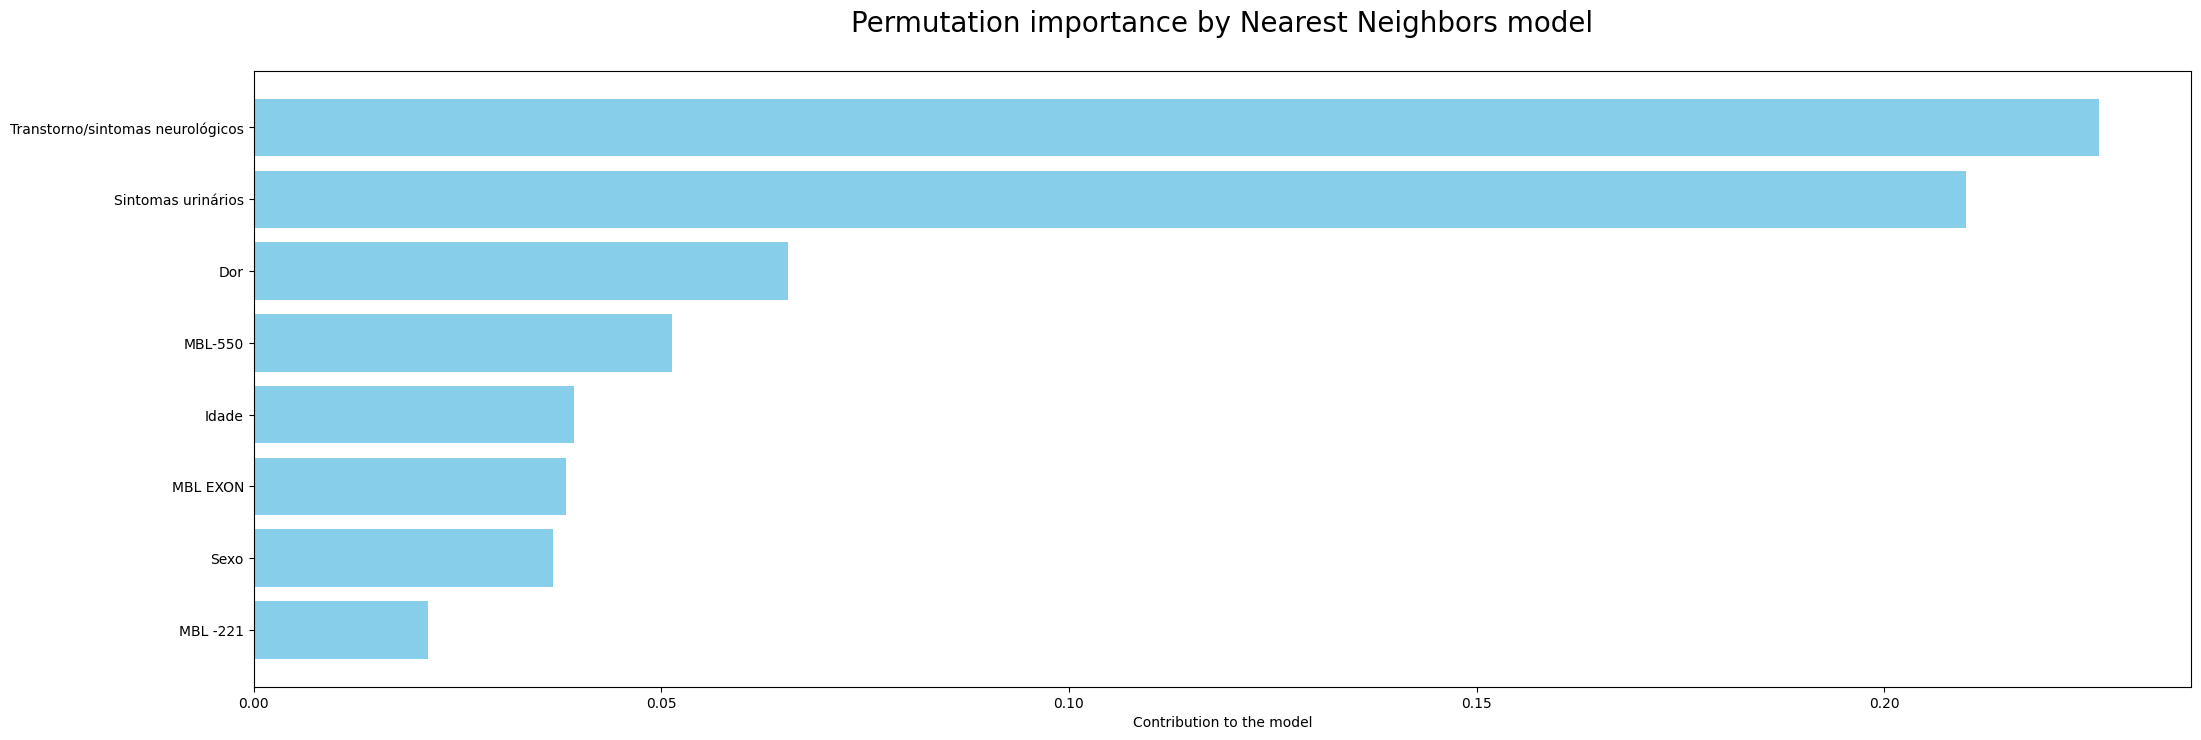

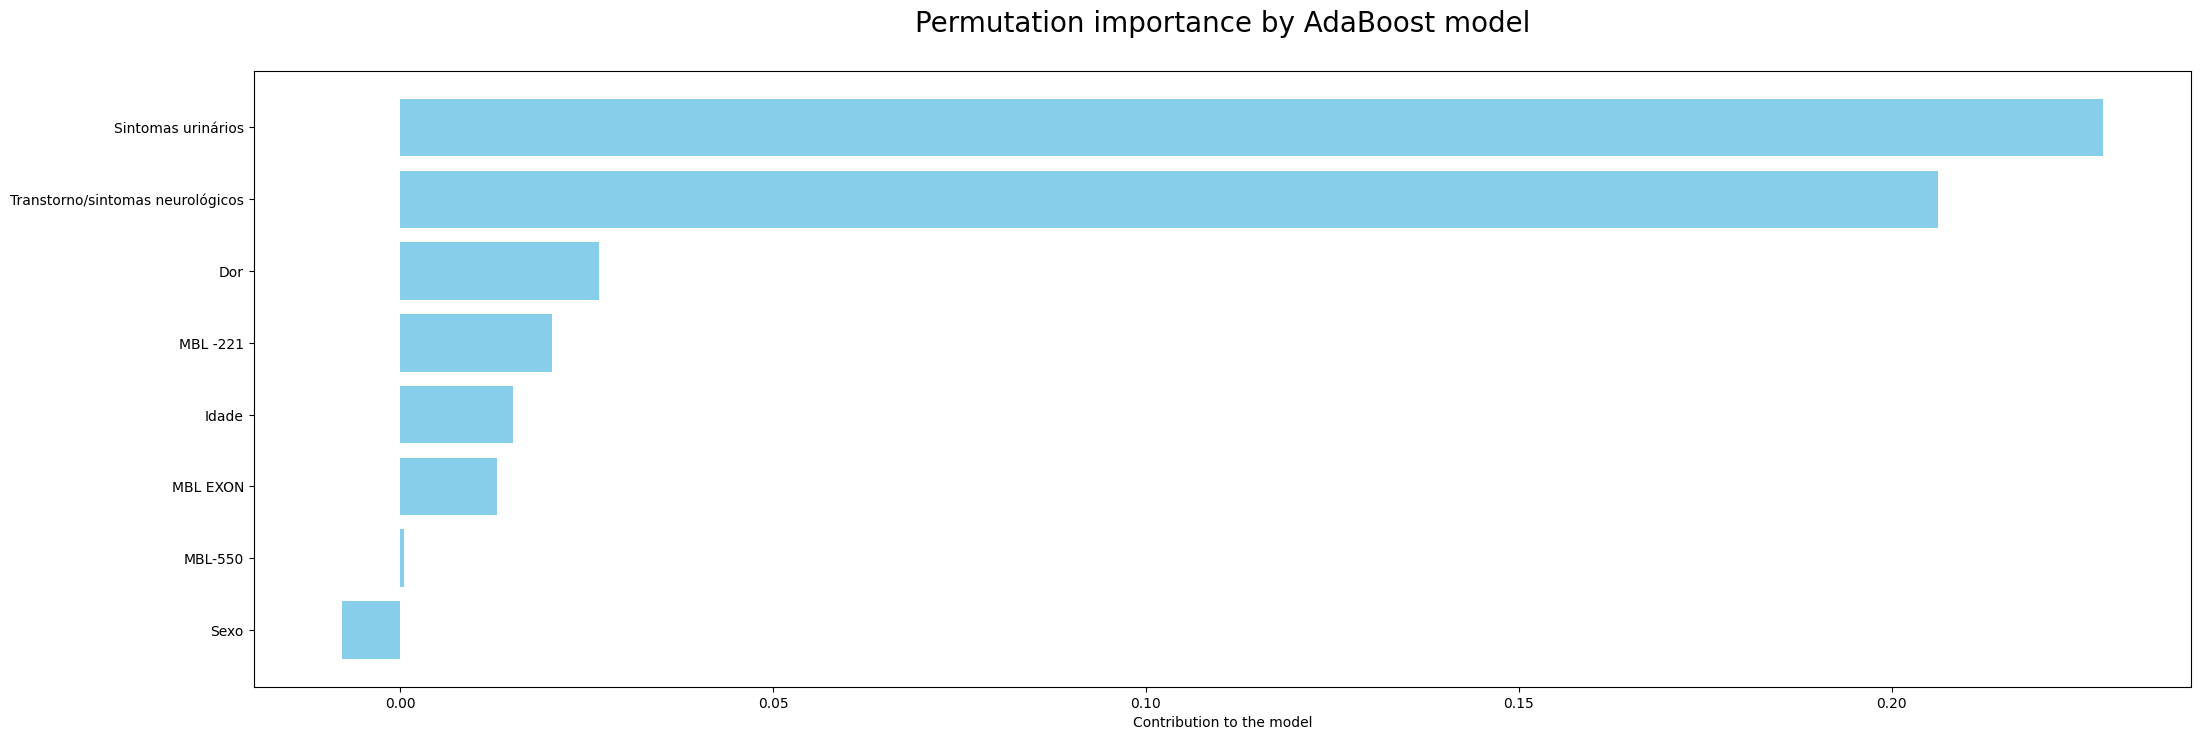

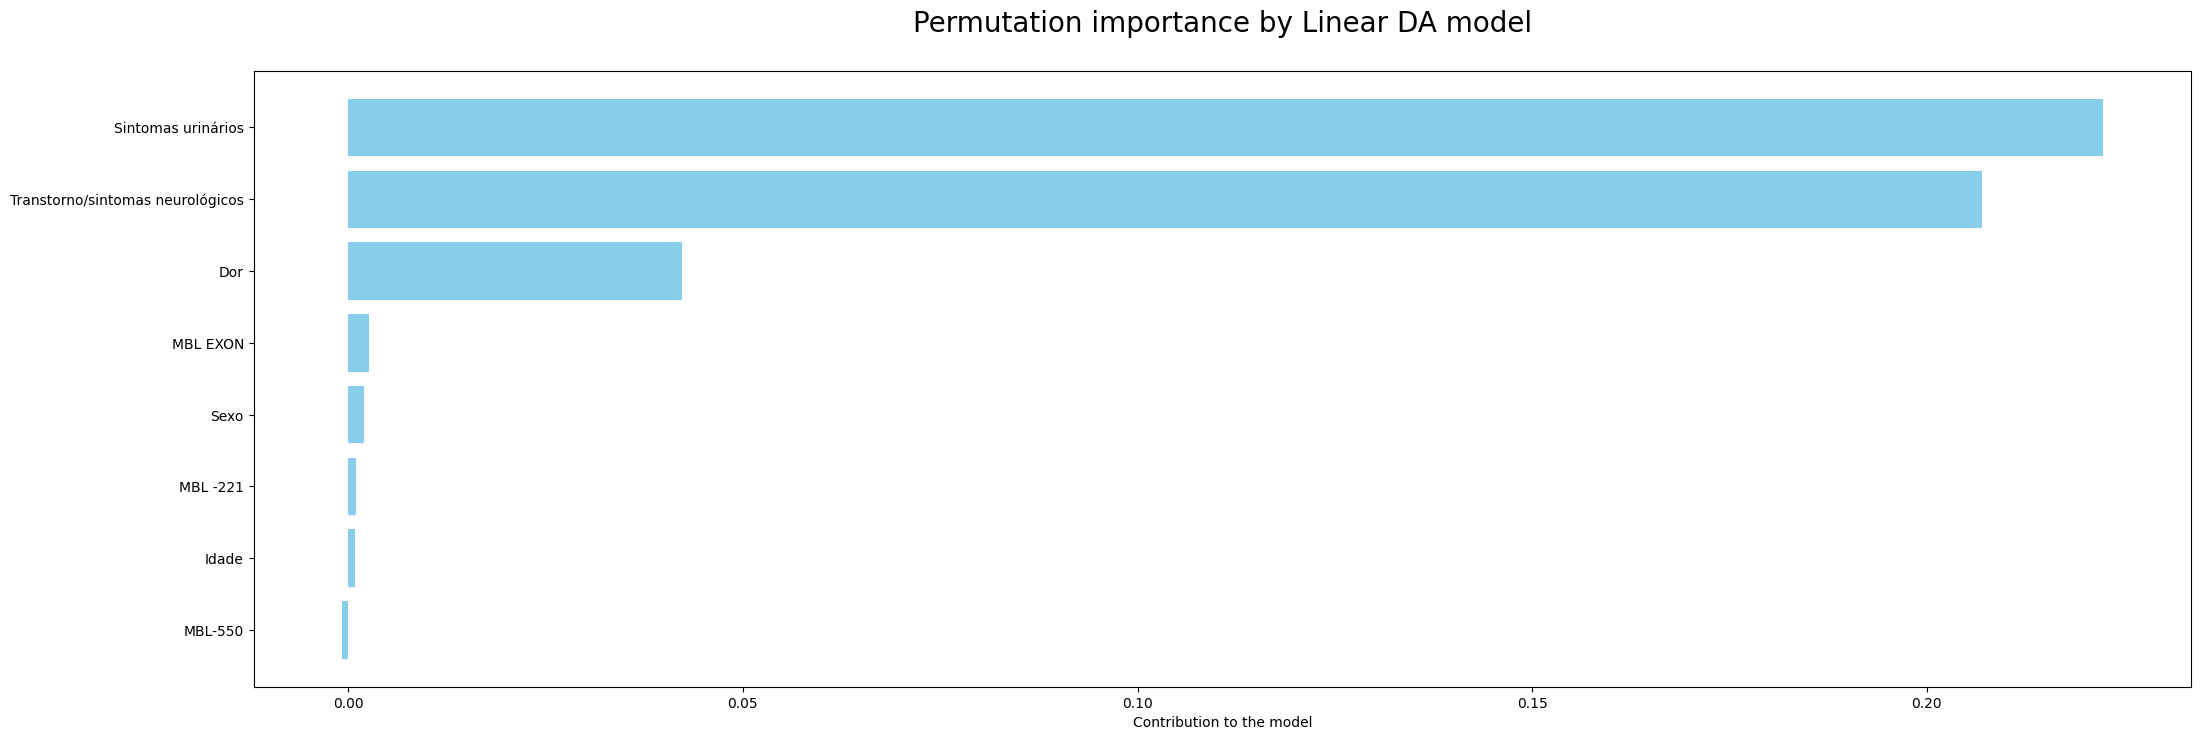

In [ ]:
# Create the column_names matrix
column_names = df.columns
n_splits = 5
data_table = pd.DataFrame()
seed = 42

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5)

for item, nome in zip(classifiers, names):
    for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        item.fit(X_train, y_train)

    # Calculate the importance of permutation using the "item" model
    features_contribution = permutation_importance(item, X_train, y_train, n_repeats=30, random_state=0)
    sorted_index = np.argsort(features_contribution.importances_mean)

    # Check that the number of column_names is equal to the consistent sorted_index
    num_features = min(len(column_names), len(sorted_index))

    # Printing permutation importance values and sending them to the drive
    with open(f'Permutation_importance.txt {nome}', 'w') as arquivo:
        print(f'Classifier: {nome}', file=arquivo)
        for i in range(num_features):
            coluna = df.columns[sorted_index[i]]
            print(f"Feature: {coluna} - Importance: {features_contribution.importances_mean[sorted_index[i]]:.3f} +/- {features_contribution.importances_std[sorted_index[i]]:.3f}", file=arquivo)
            print(file=arquivo)

    # Plotting the horizontal bar chart
    plt.figure(figsize=(25, 8))
    plt.barh(range(X_train.shape[1]), features_contribution.importances_mean[sorted_index], color='skyblue')
    plt.yticks(range(X_train.shape[1]), [column_names[i] for i in sorted_index], fontsize=10)
    plt.xlabel('Contribution to the model')
    plt.title(f'Permutation importance by {nome} model', fontsize=20, y=1.05)

    plt.savefig(f'/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Pós-qualificação/XAI/Permutation importance {nome}.jpeg')
    plt.show()


**Feature importance**

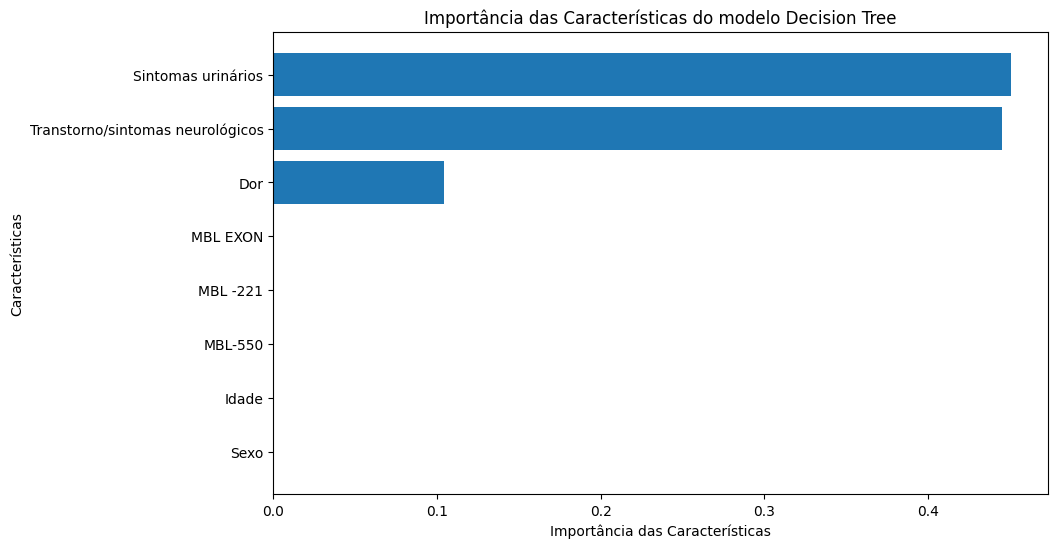

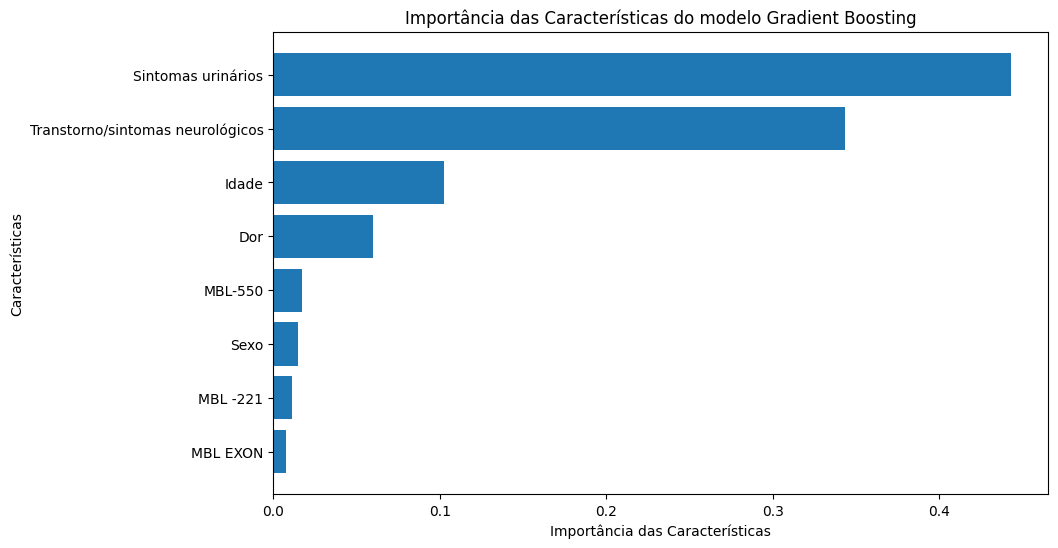

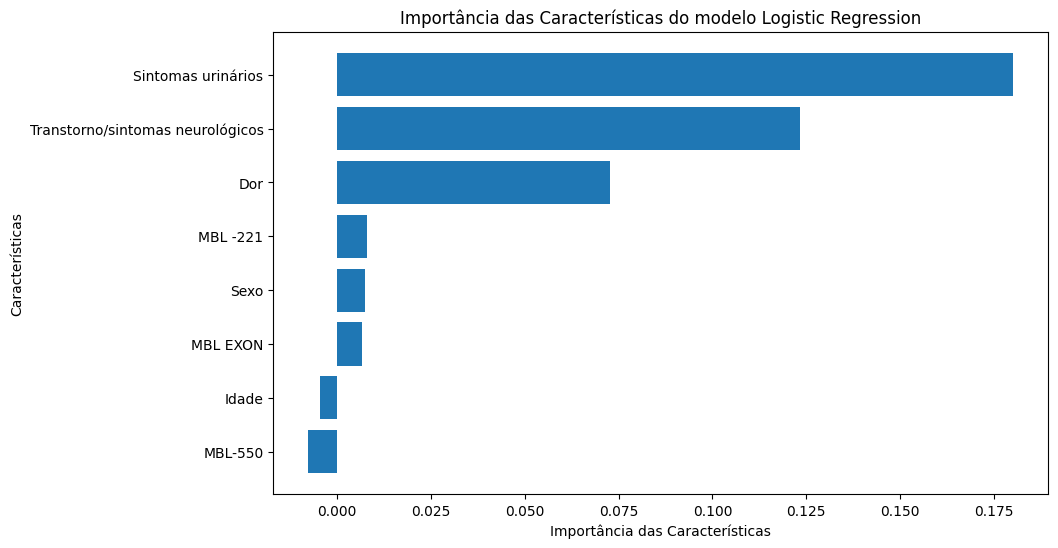

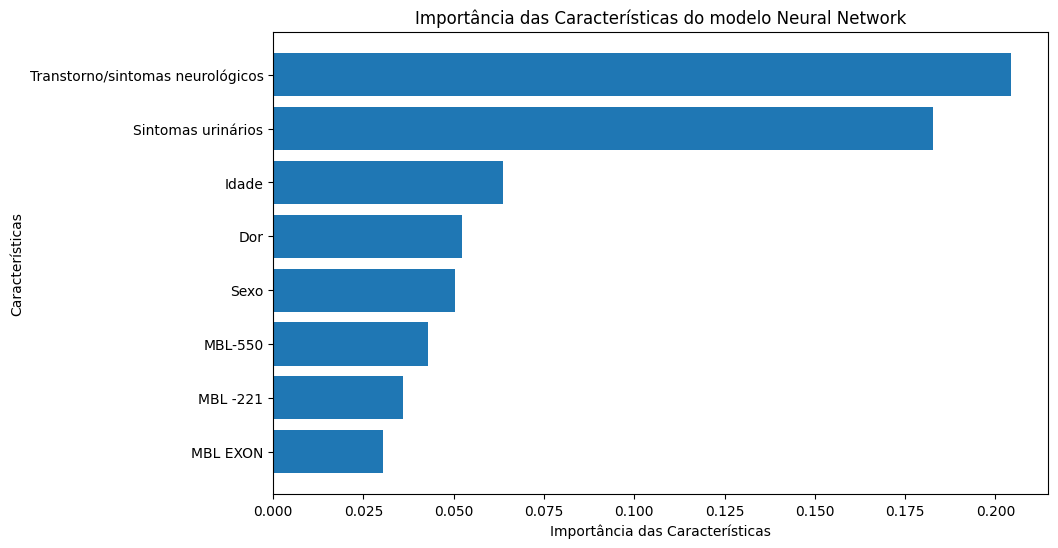

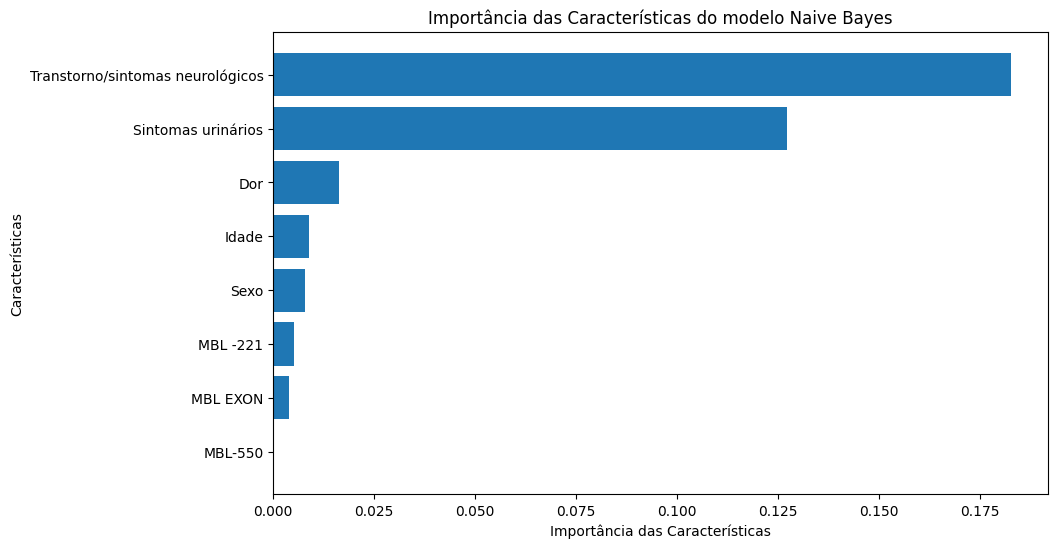

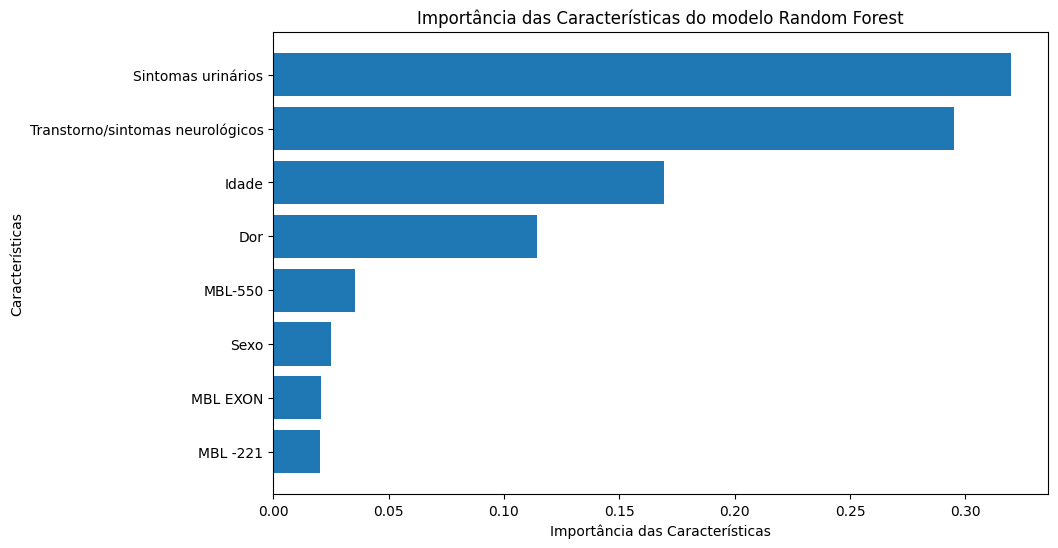

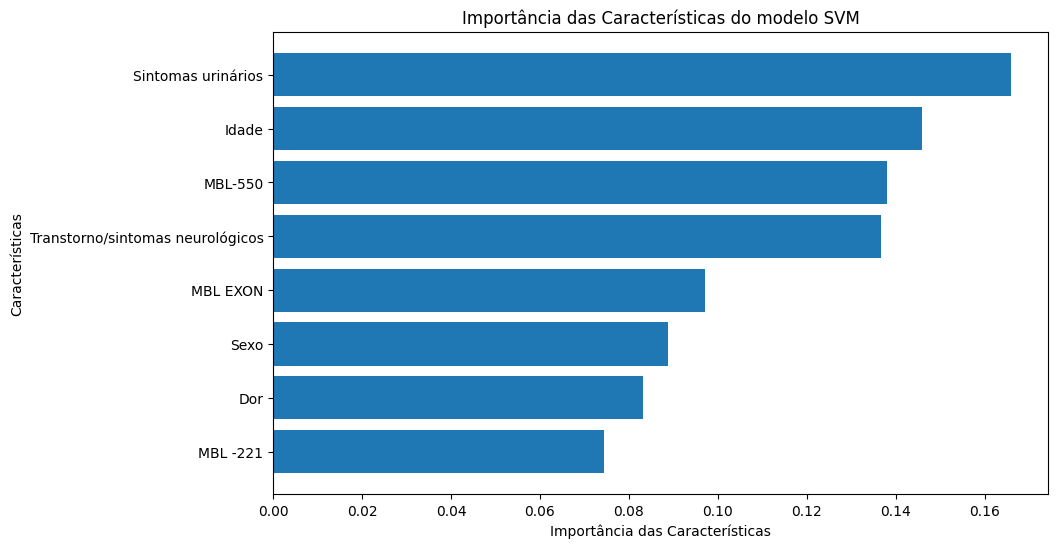

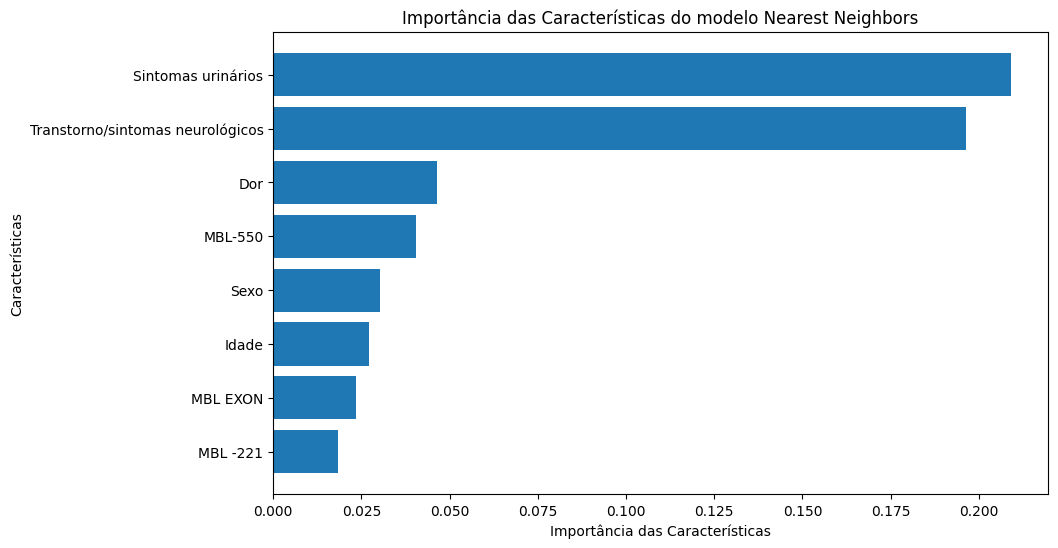

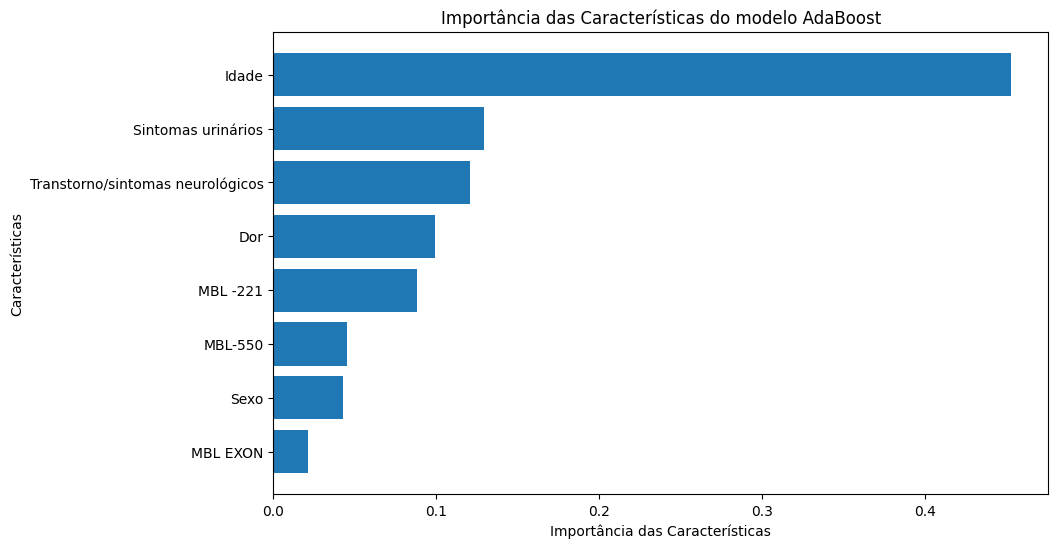

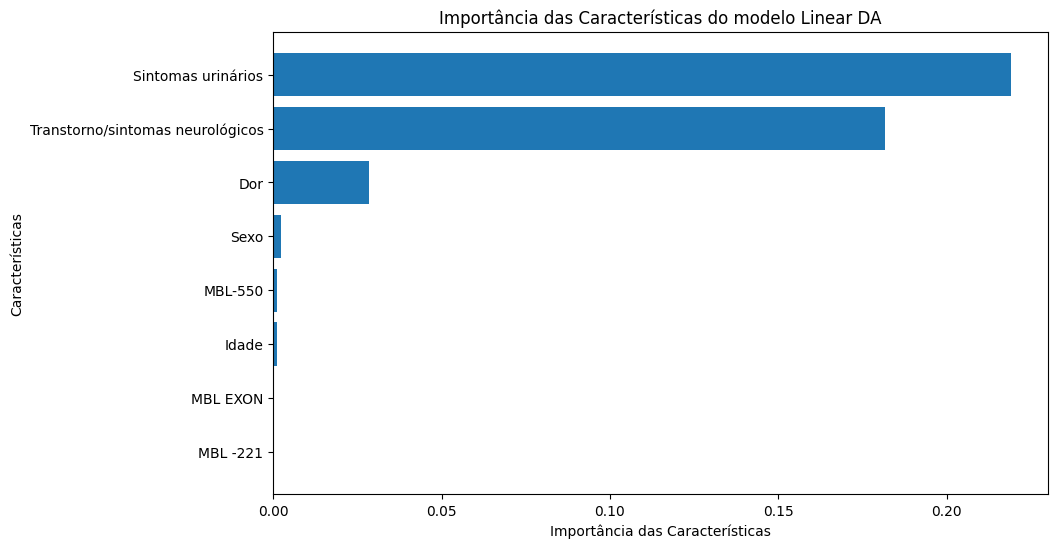

In [ ]:
# Training and calculating the importance of characteristics
for item, nome in zip(classifiers, names):
    item.fit(X_train, y_train)

    importances_list = []

    for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
        X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

        # Check that the classifier has the 'feature_importances_' attribute
        if hasattr(item, 'feature_importances_'):
            # Obter as importâncias das características
            importances = item.feature_importances_
            importances_list.append(importances)

        # If the classifier has no 'feature_importances_', calculate the Permutation Importance
        else:
            from sklearn.inspection import permutation_importance
            result = permutation_importance(item, X_test_fold, y_test_fold, n_repeats=10, random_state=42, n_jobs=-1)
            importances = result.importances_mean
            importances_list.append(importances)

    # Calculate the average importance along the folds
    mean_importances = np.mean(importances_list, axis=0)
    sorted_indices = np.argsort(mean_importances)

    # Plot the importance of characteristics
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(mean_importances)), mean_importances[sorted_indices], align='center')
    plt.yticks(range(len(mean_importances)), X.columns[sorted_indices])
    plt.xlabel('Importância das Características')
    plt.ylabel('Características')
    plt.title(f'Importância das Características do modelo {nome}')
    plt.savefig(f'/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Pós-qualificação/XAI/Feature importance {nome}.jpeg')
    plt.show()

# **SHAP**

Importância das Características do modelo Decision Tree


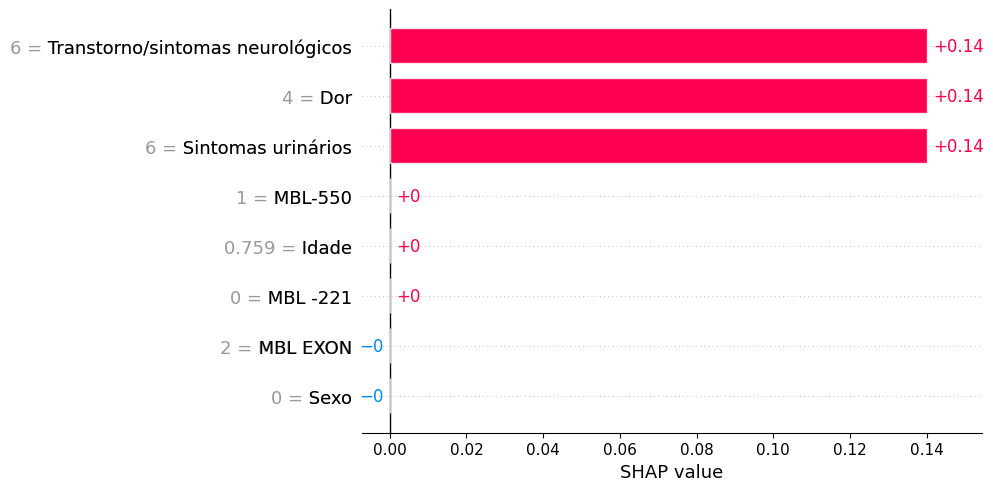

Importância das Características do modelo Decision Tree


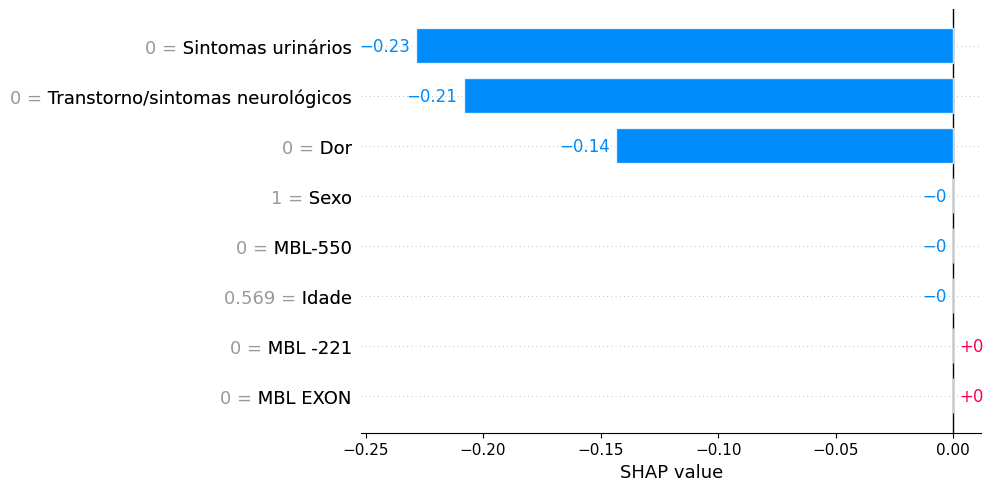

Importância das Características do modelo Decision Tree


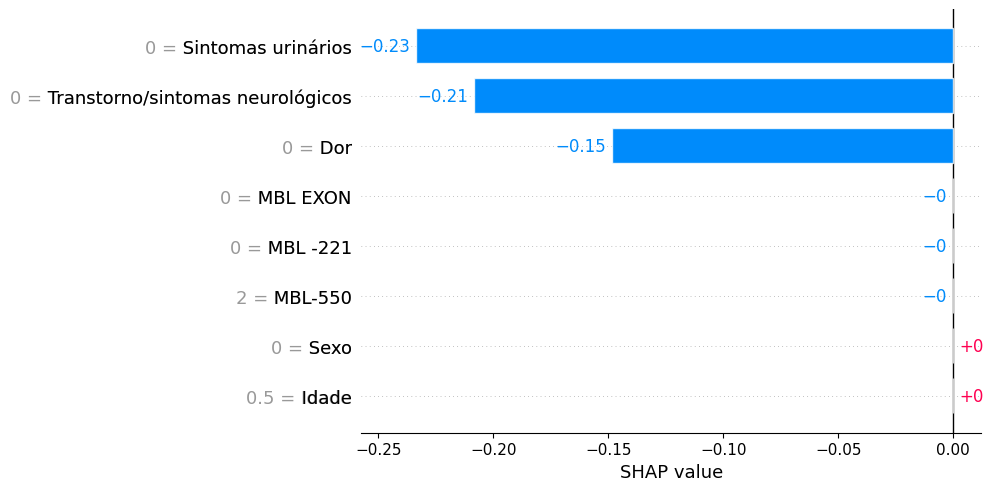

Importância das Características do modelo Decision Tree


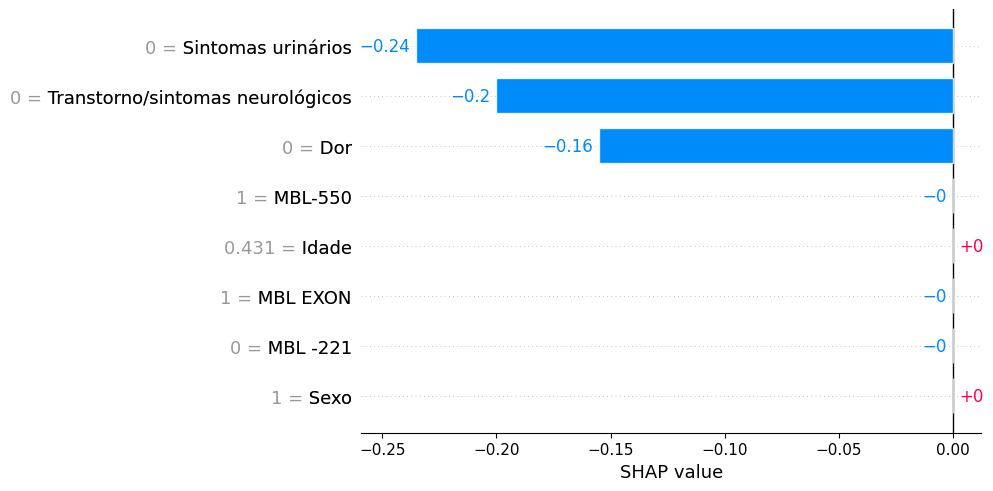

Importância das Características do modelo Decision Tree


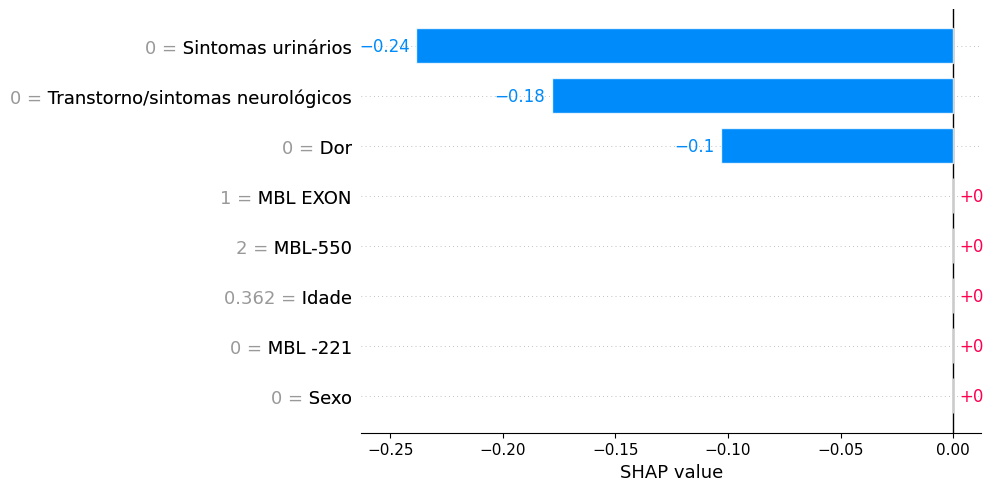

Importância das Características do modelo Gradient Boosting


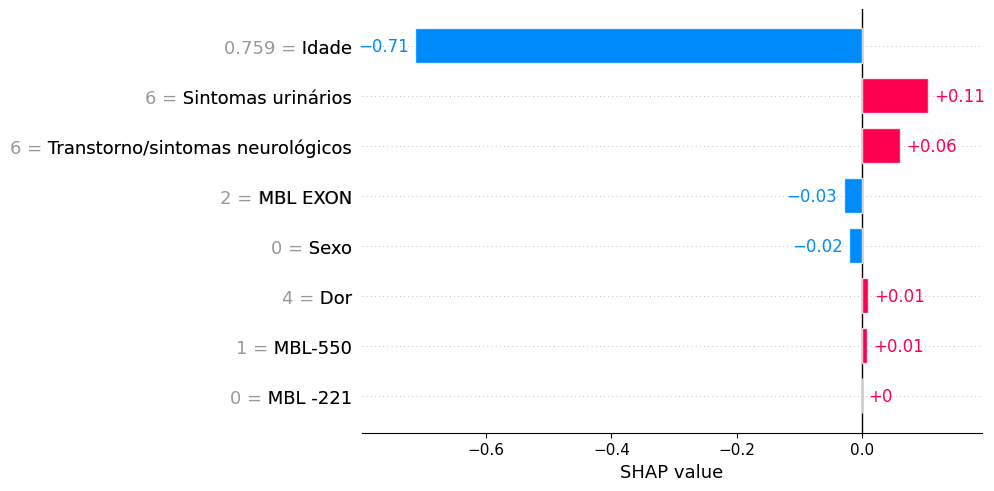

Importância das Características do modelo Gradient Boosting


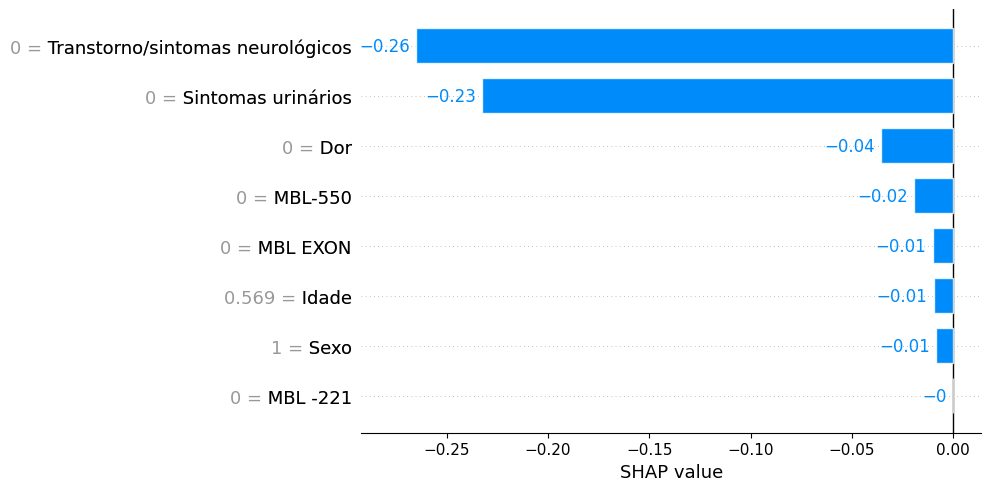

Importância das Características do modelo Gradient Boosting


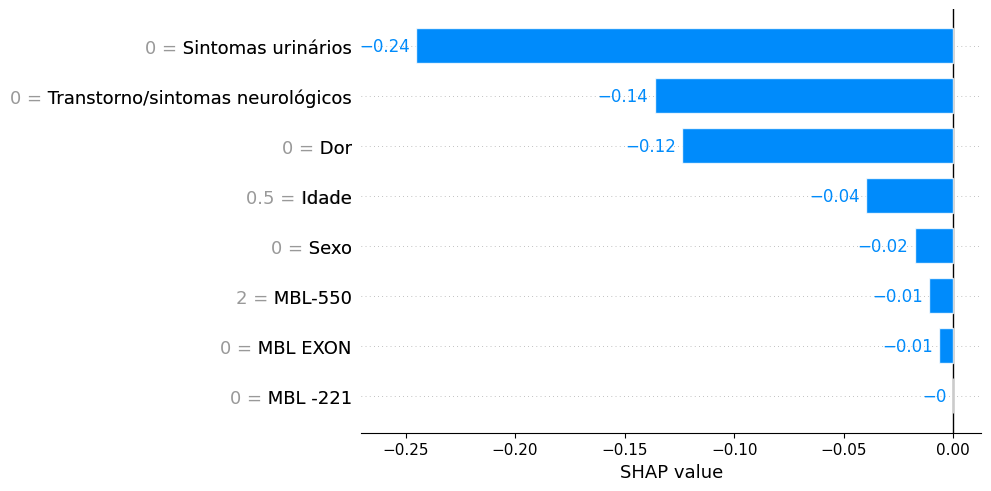

Importância das Características do modelo Gradient Boosting


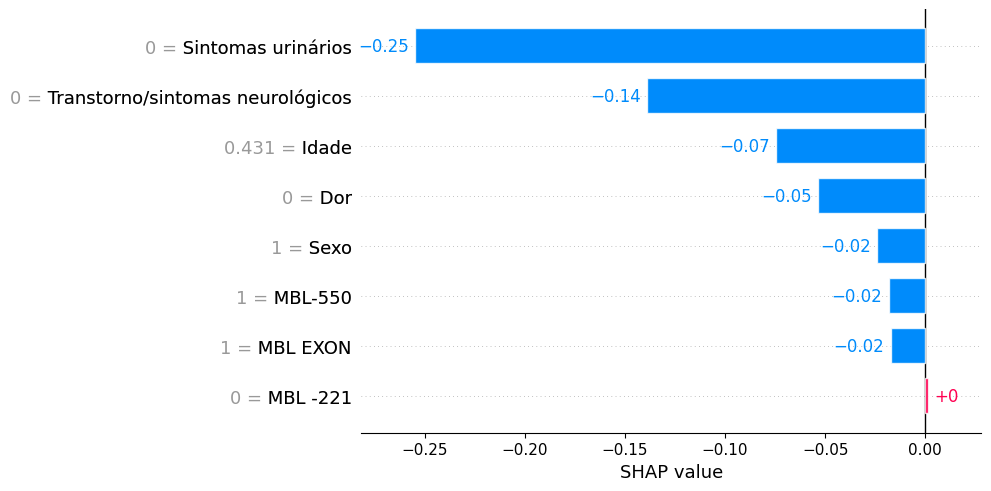

Importância das Características do modelo Gradient Boosting


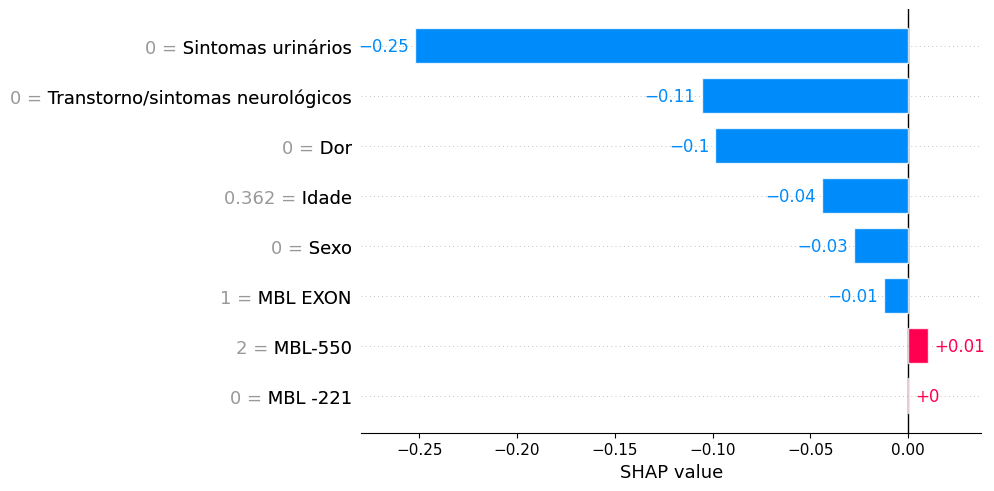

Importância das Características do modelo Logistic Regression


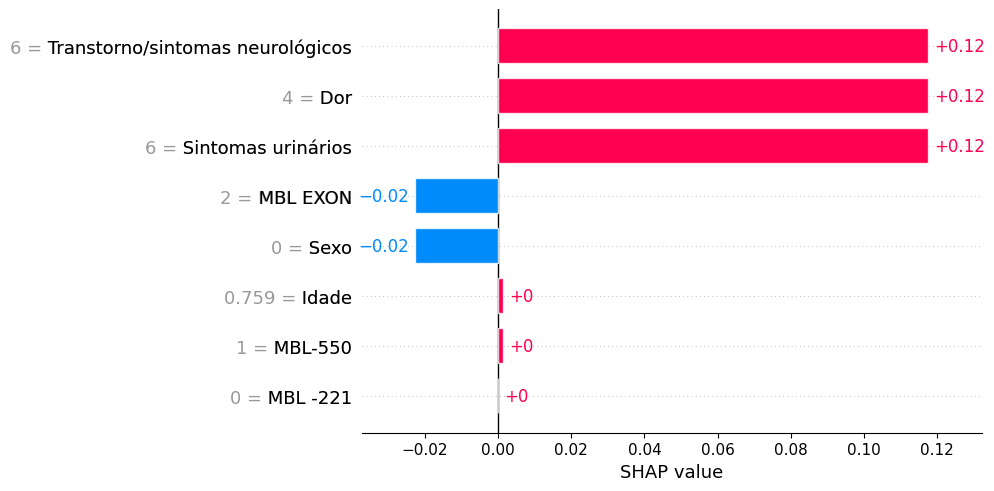

Importância das Características do modelo Logistic Regression


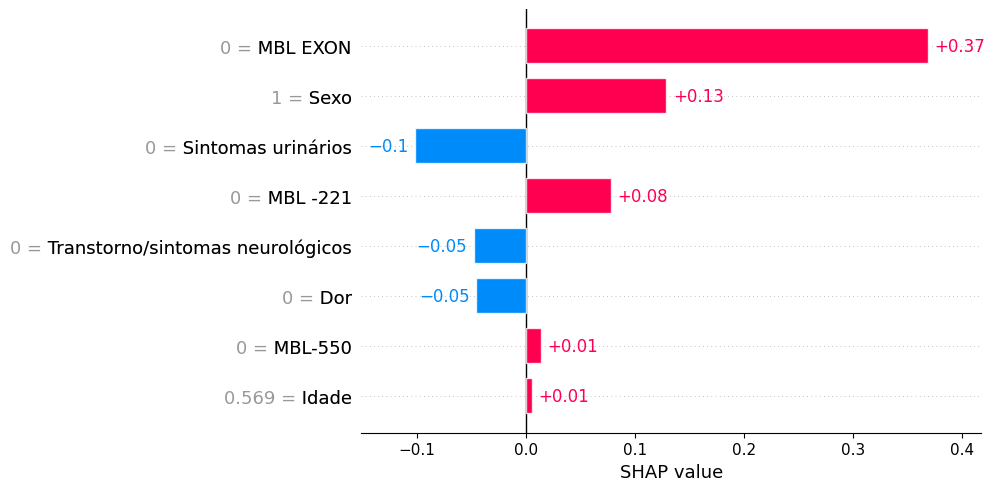

Importância das Características do modelo Logistic Regression


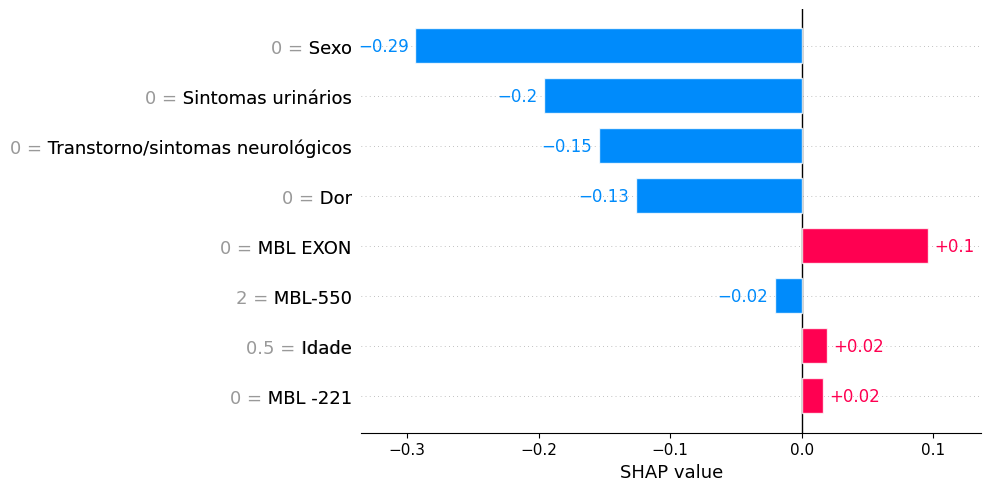

Importância das Características do modelo Logistic Regression


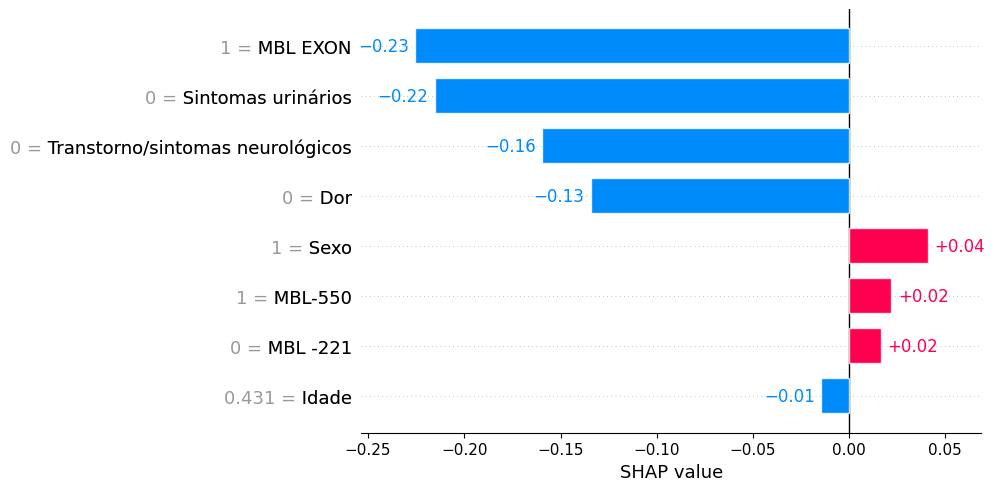

Importância das Características do modelo Logistic Regression


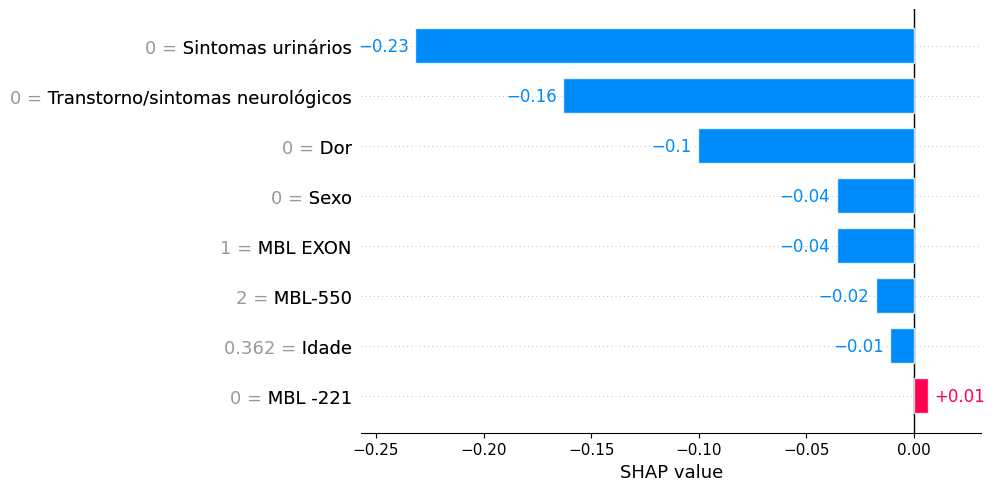

Importância das Características do modelo Neural Network


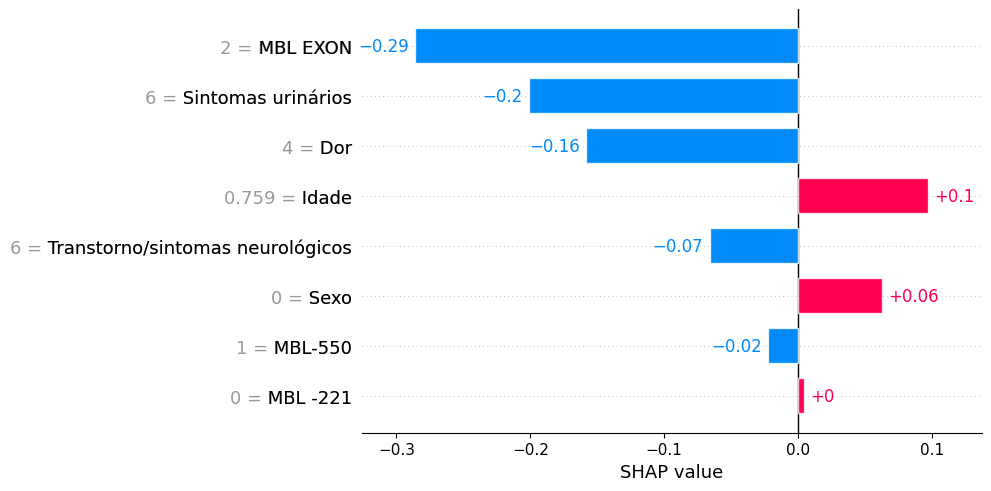

Importância das Características do modelo Neural Network


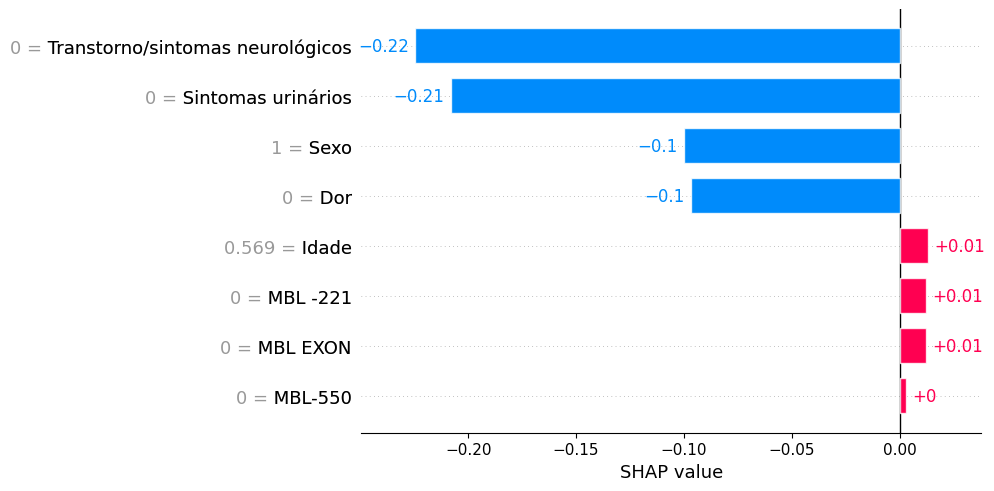

Importância das Características do modelo Neural Network


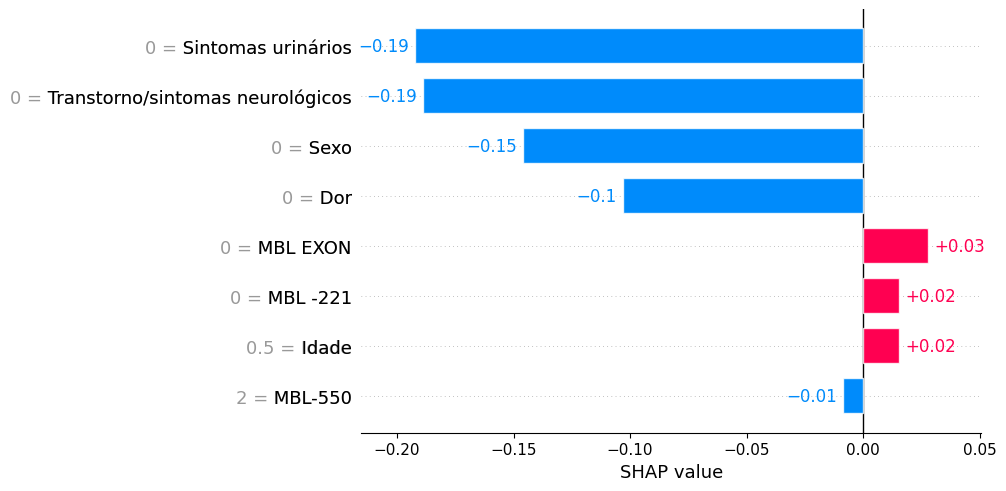

Importância das Características do modelo Neural Network


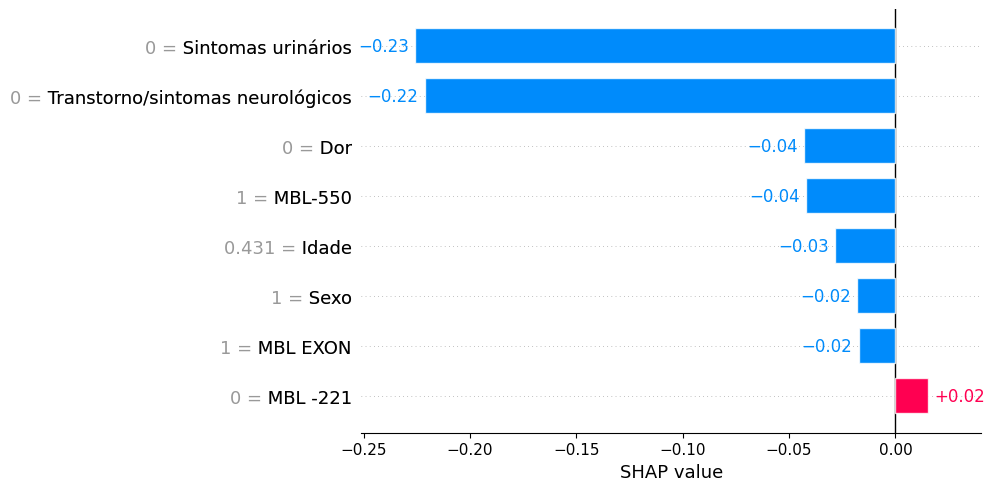

Importância das Características do modelo Neural Network


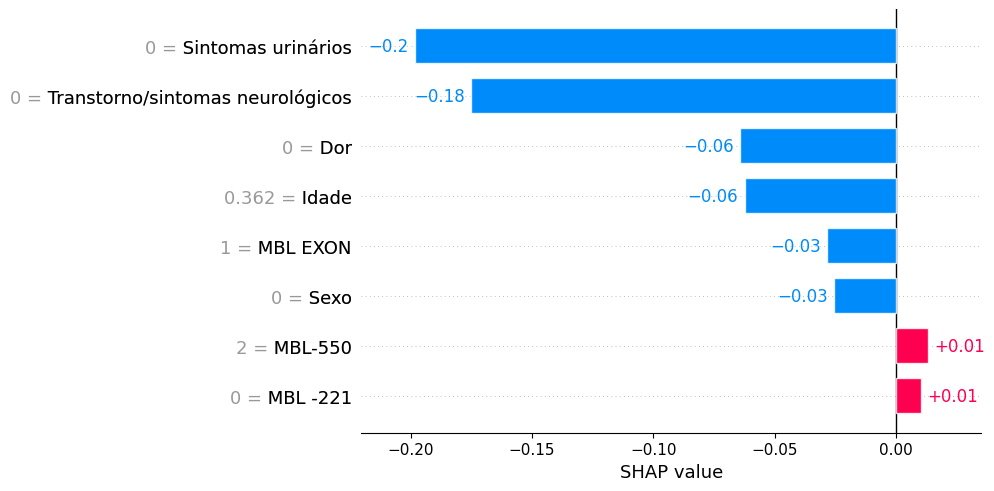

Importância das Características do modelo Naive Bayes


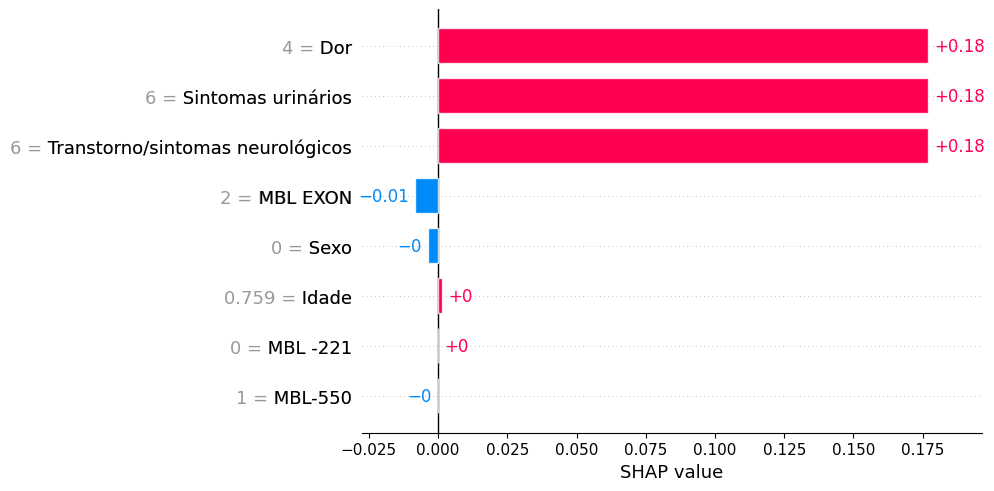

Importância das Características do modelo Naive Bayes


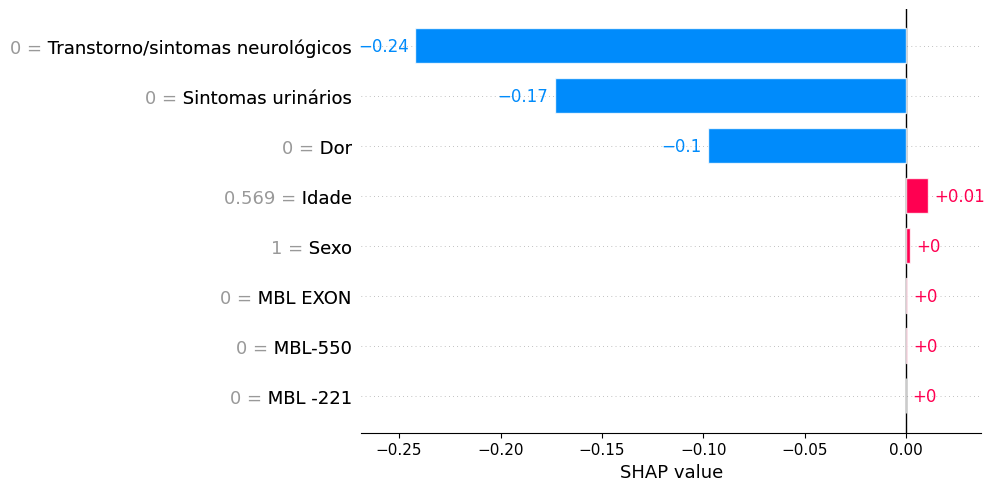

Importância das Características do modelo Naive Bayes


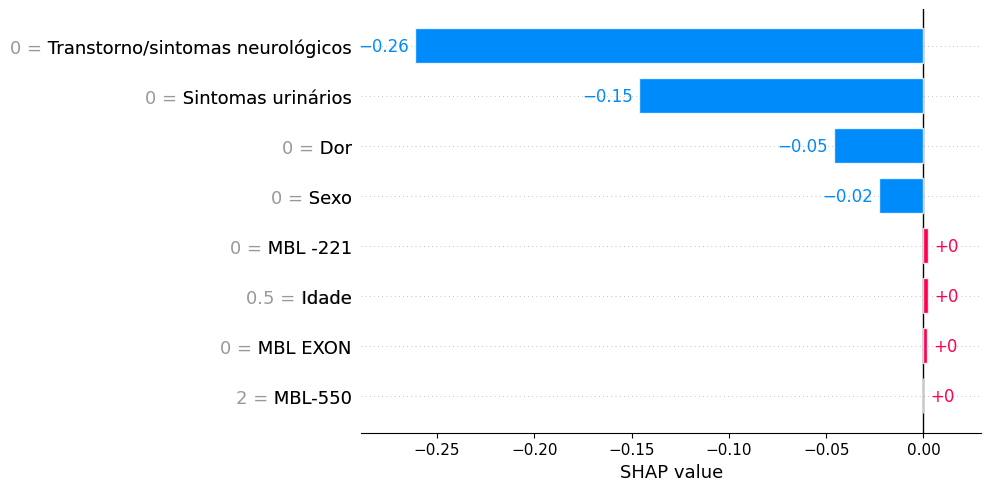

Importância das Características do modelo Naive Bayes


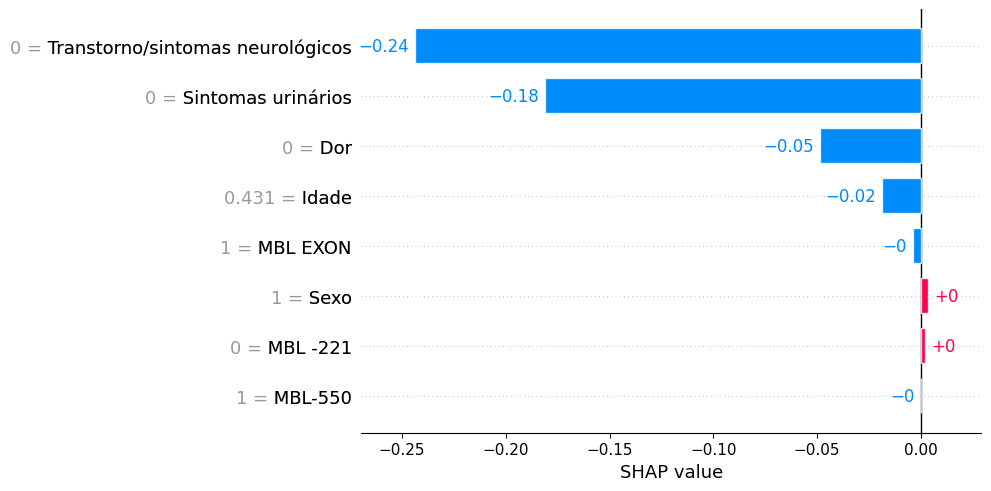

Importância das Características do modelo Naive Bayes


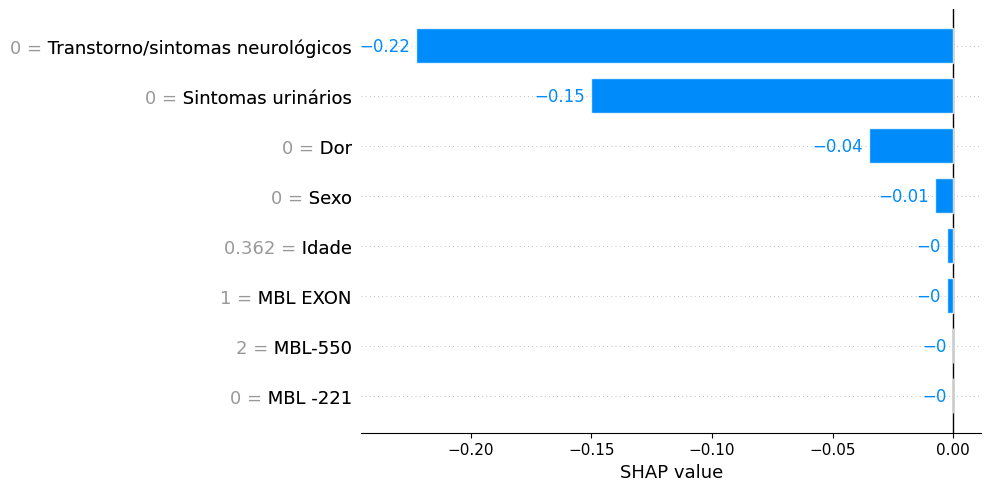

ExactExplainer explainer: 51it [00:17,  1.02s/it]


Importância das Características do modelo Random Forest


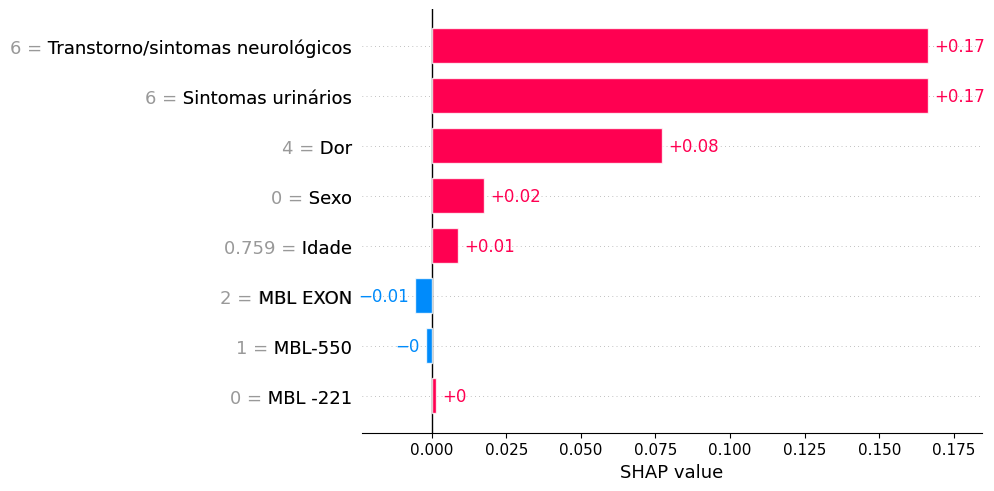

ExactExplainer explainer: 51it [00:15,  1.10s/it]


Importância das Características do modelo Random Forest


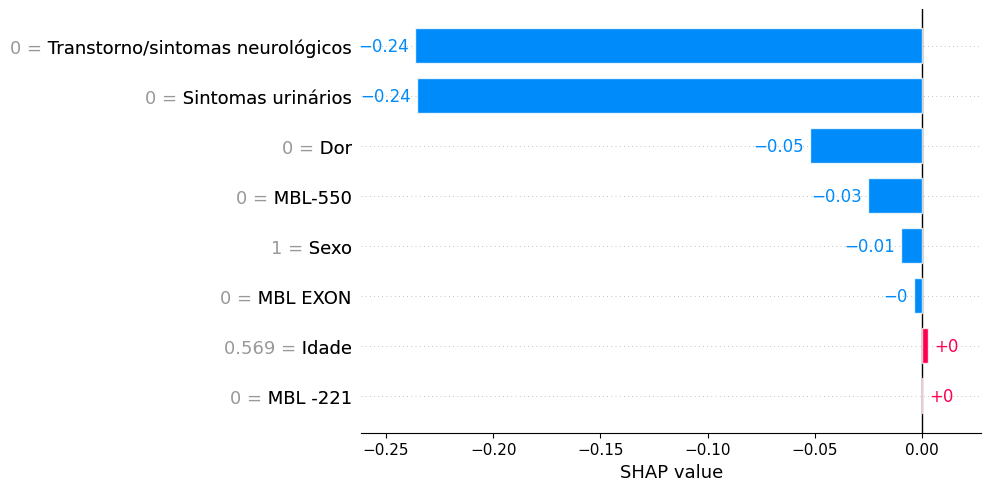

ExactExplainer explainer: 51it [00:16,  1.09s/it]


Importância das Características do modelo Random Forest


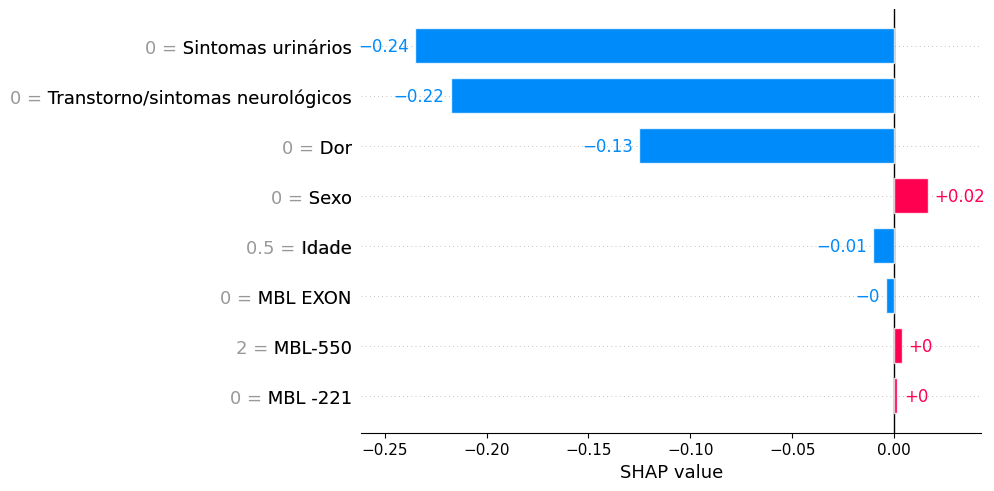

ExactExplainer explainer: 51it [00:14,  1.02it/s]


Importância das Características do modelo Random Forest


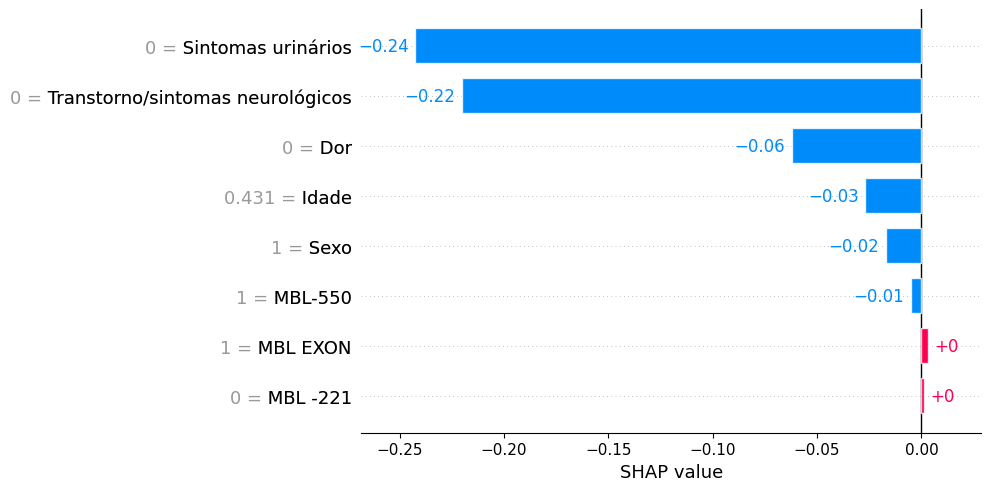

ExactExplainer explainer: 51it [00:16,  1.19it/s]


Importância das Características do modelo Random Forest


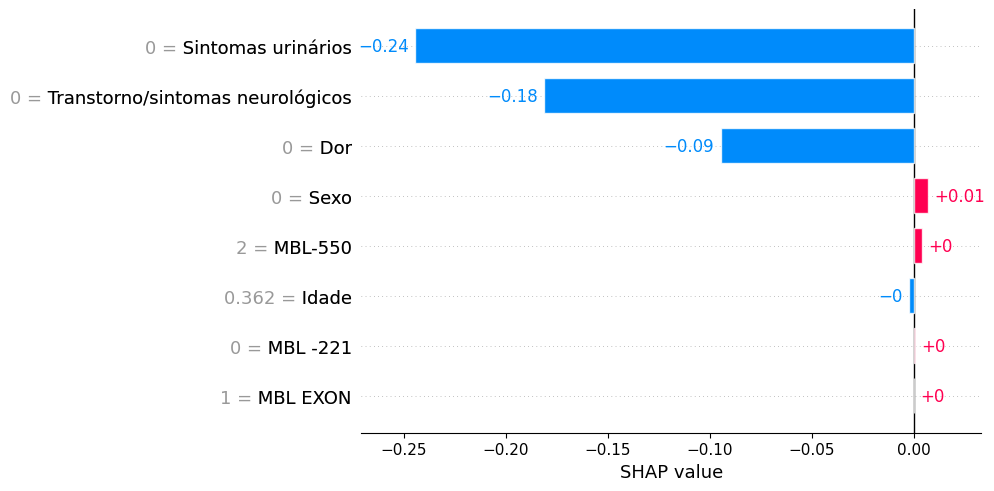

ExactExplainer explainer: 51it [00:11,  1.89s/it]


Importância das Características do modelo SVM


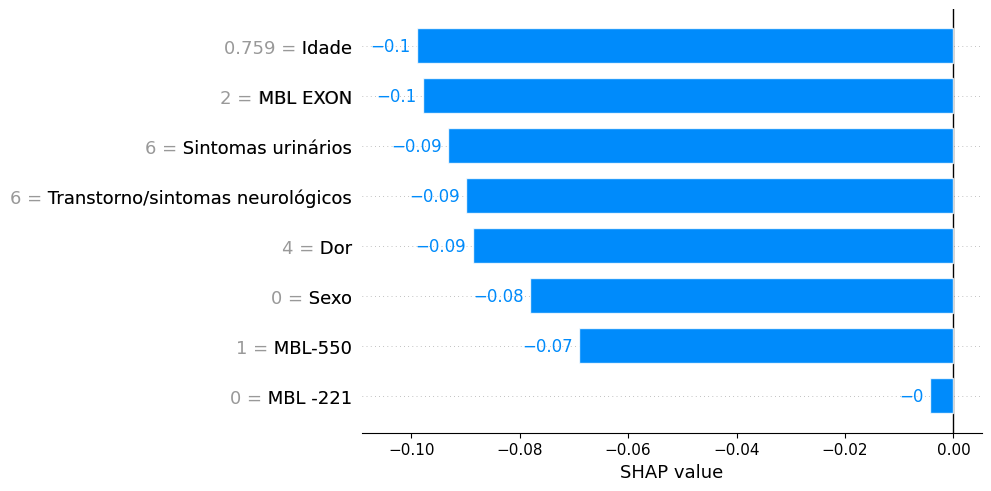

Importância das Características do modelo SVM


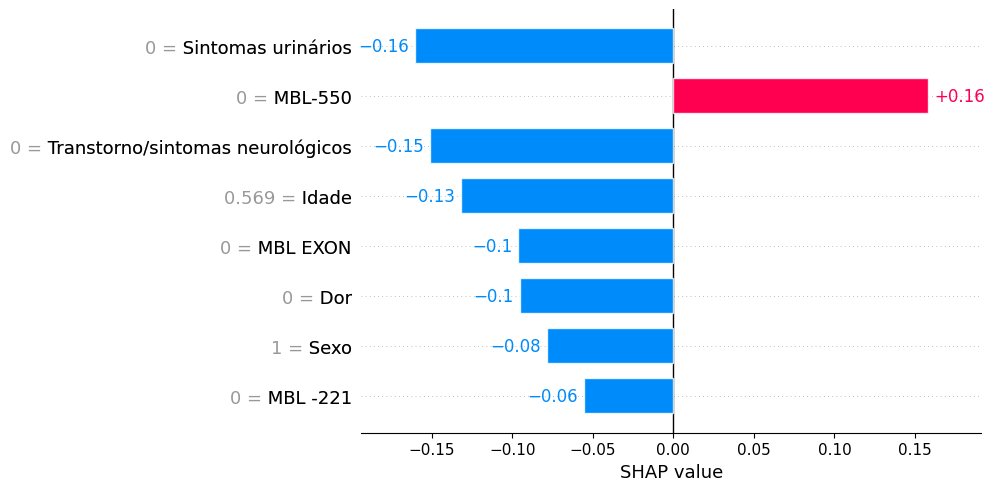

Importância das Características do modelo SVM


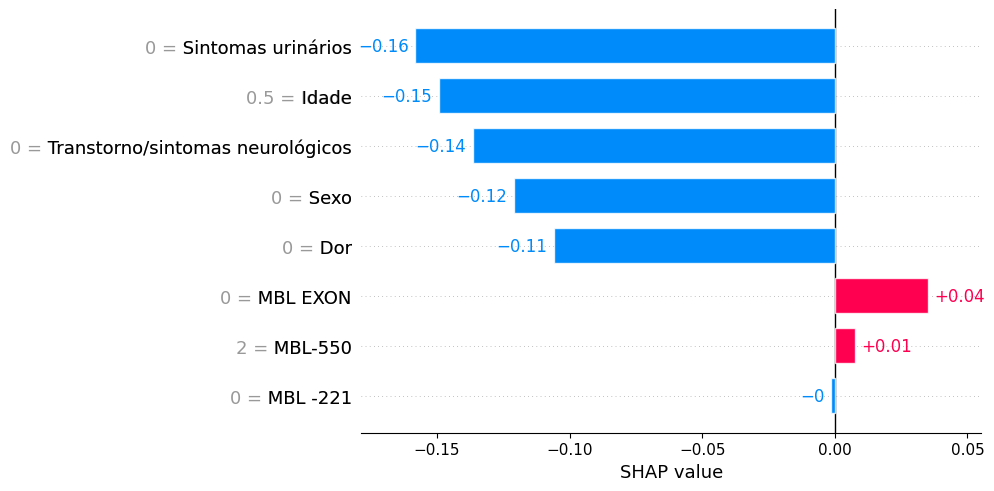

ExactExplainer explainer: 51it [00:10,  5.11s/it]


Importância das Características do modelo SVM


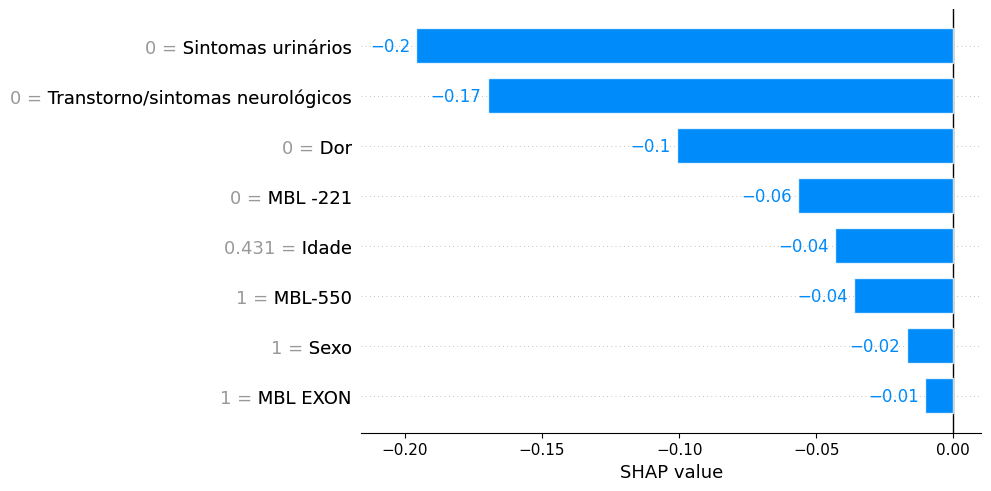

Importância das Características do modelo SVM


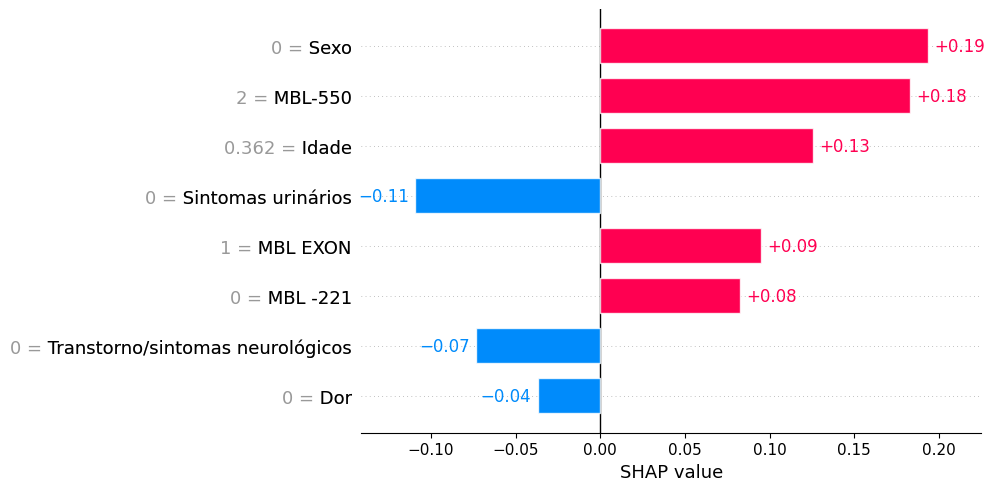

Importância das Características do modelo Nearest Neighbors


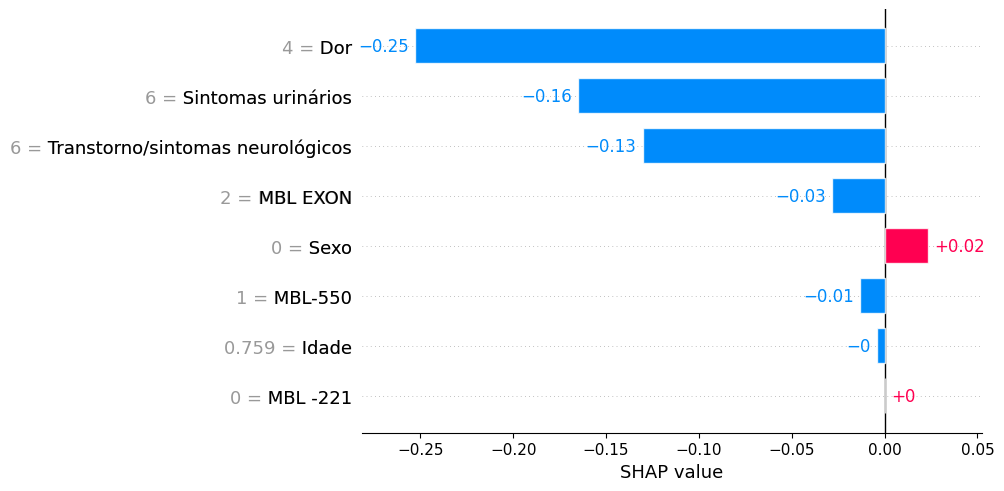

Importância das Características do modelo Nearest Neighbors


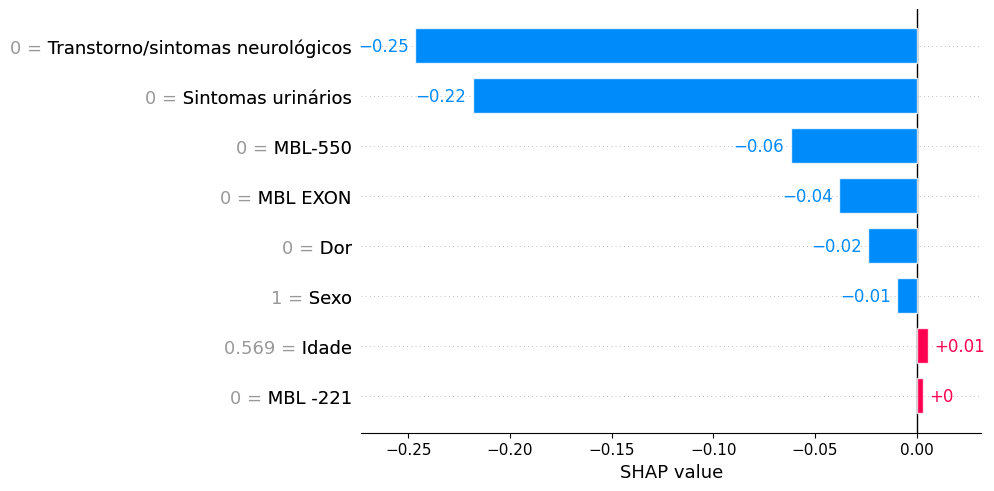

Importância das Características do modelo Nearest Neighbors


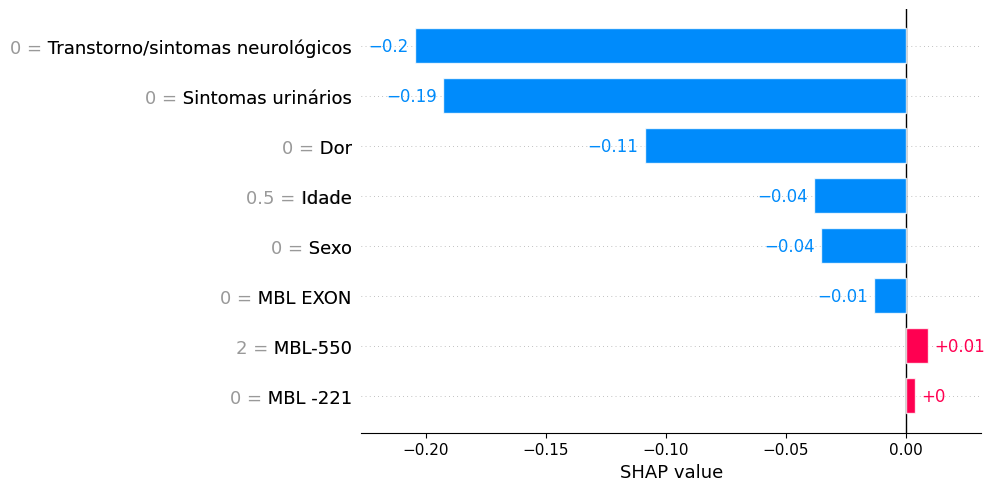

Importância das Características do modelo Nearest Neighbors


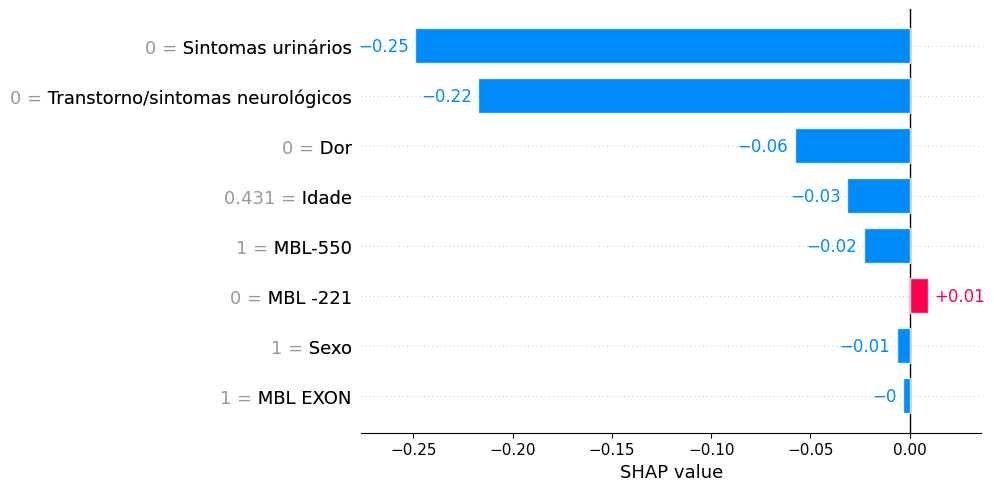

Importância das Características do modelo Nearest Neighbors


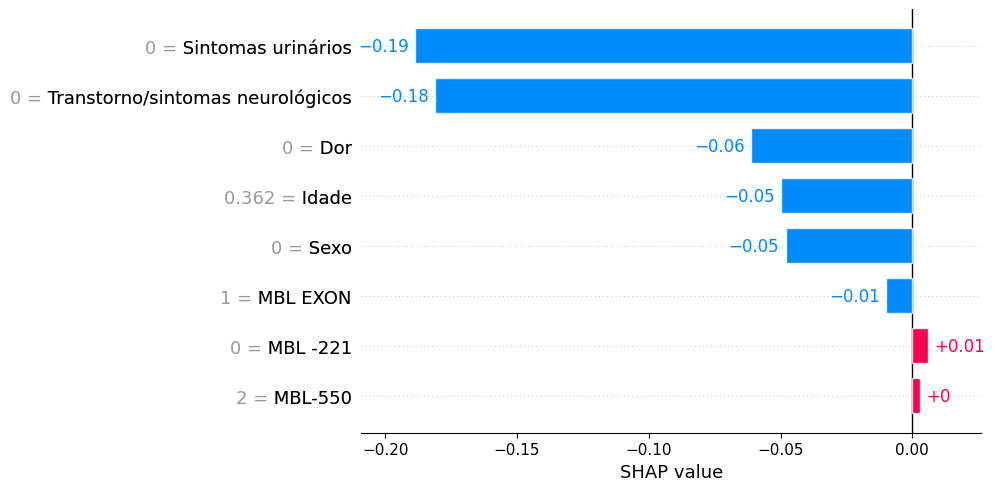

ExactExplainer explainer: 51it [00:49,  1.35s/it]


Importância das Características do modelo AdaBoost


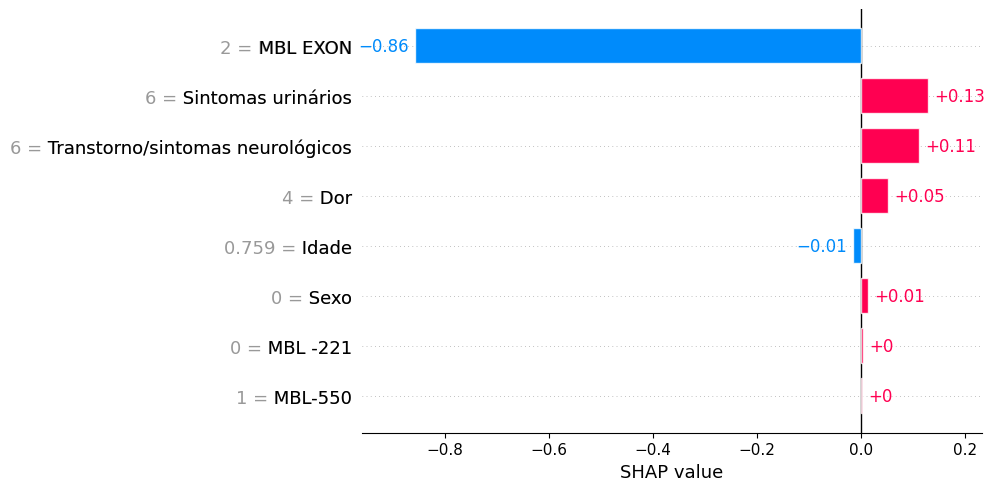

ExactExplainer explainer: 51it [00:47,  1.29s/it]


Importância das Características do modelo AdaBoost


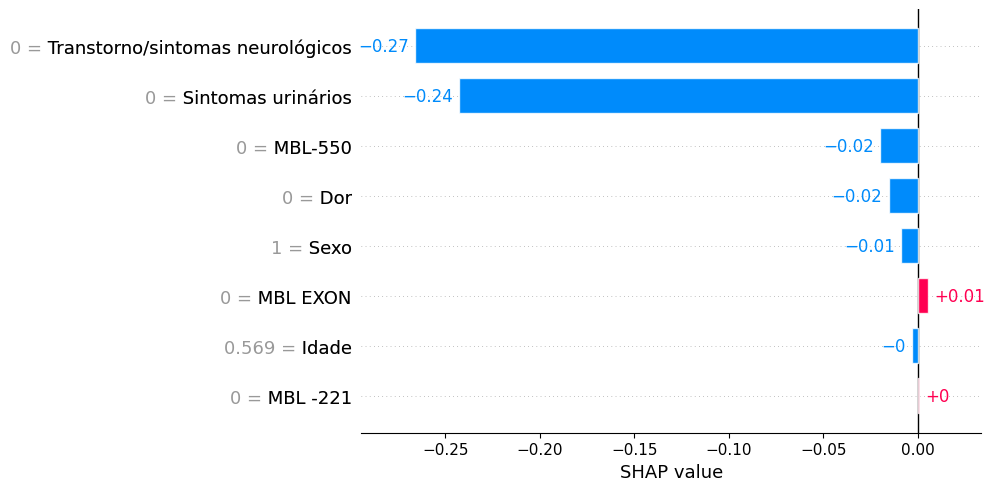

ExactExplainer explainer: 51it [00:51,  1.35s/it]


Importância das Características do modelo AdaBoost


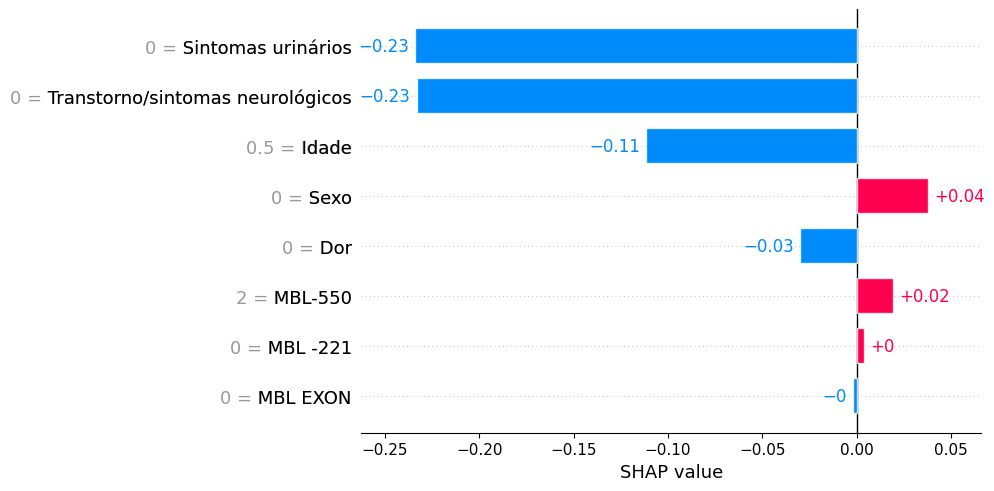

ExactExplainer explainer: 51it [00:46,  1.28s/it]


Importância das Características do modelo AdaBoost


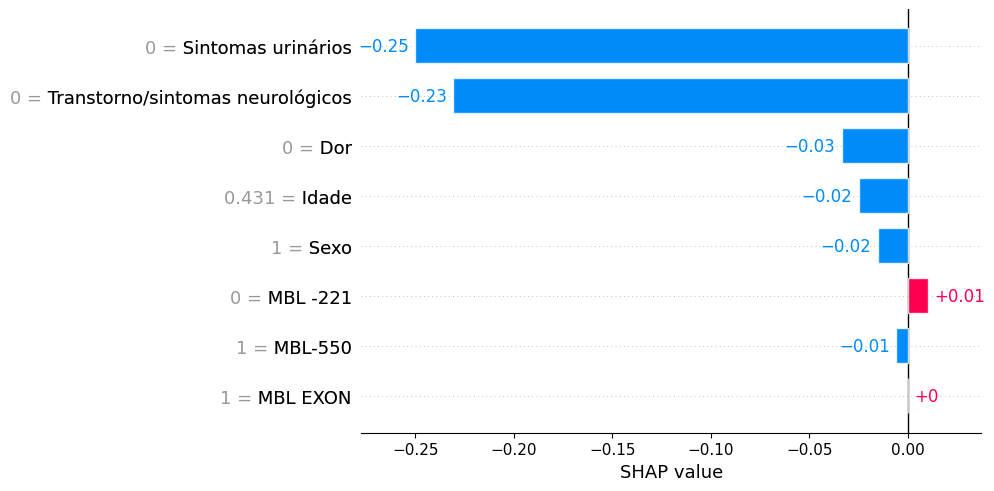

ExactExplainer explainer: 51it [00:49,  1.34s/it]


Importância das Características do modelo AdaBoost


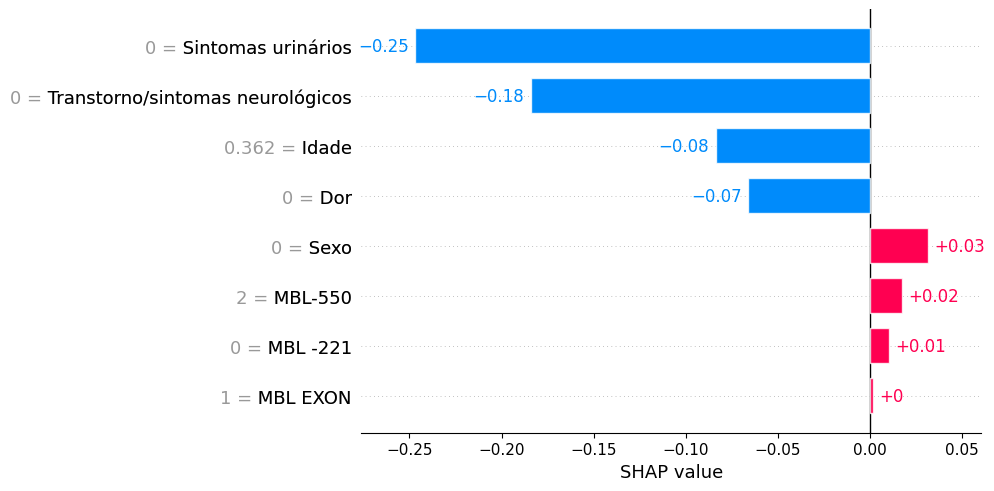

Importância das Características do modelo Linear DA


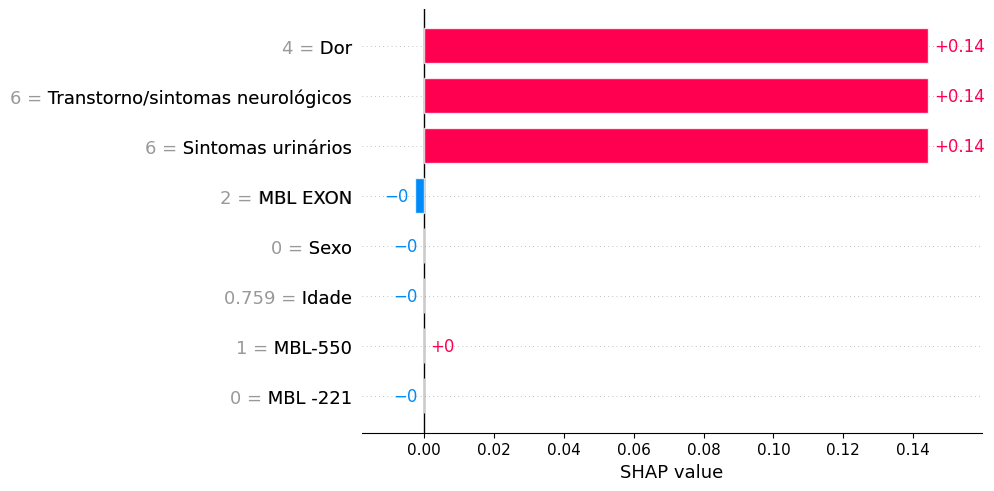

Importância das Características do modelo Linear DA


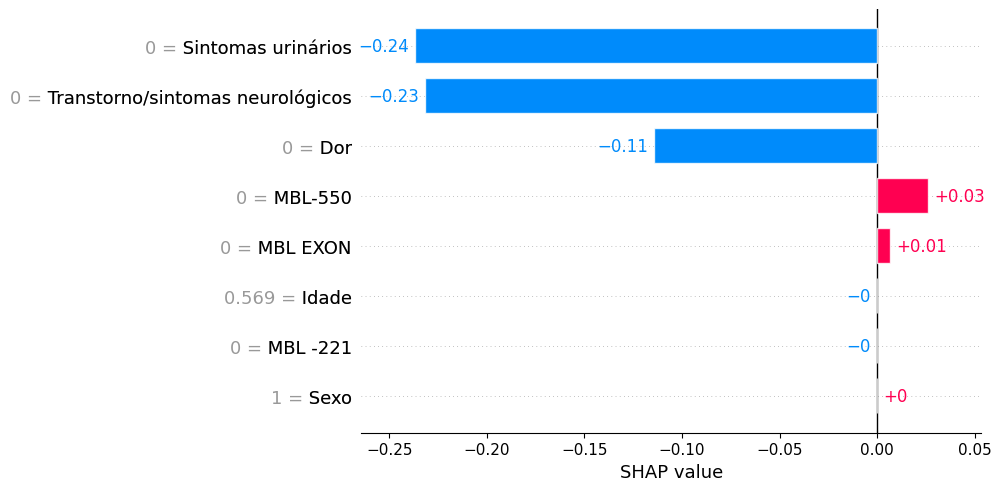

Importância das Características do modelo Linear DA


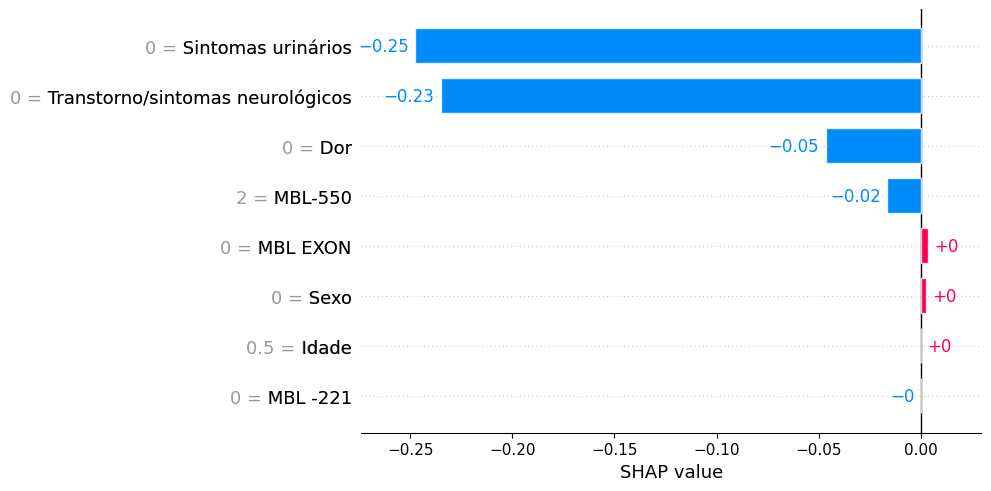

Importância das Características do modelo Linear DA


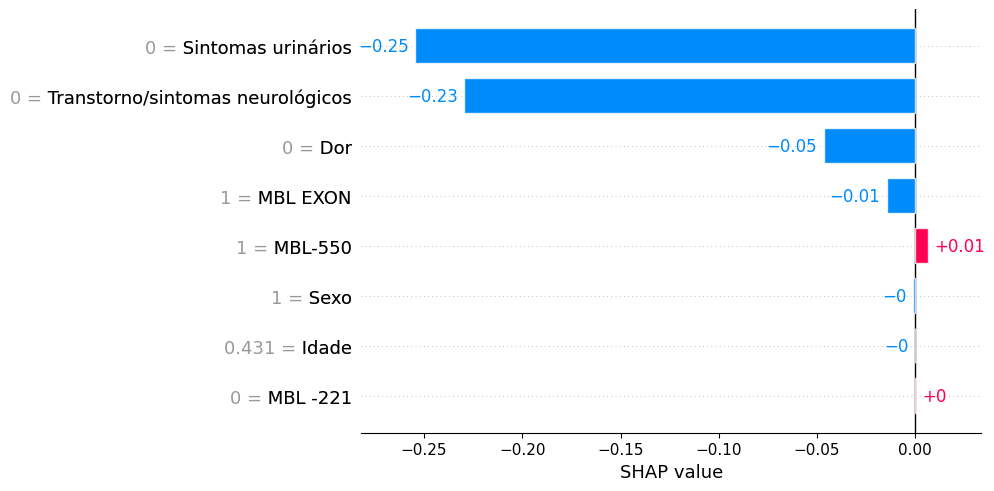

Importância das Características do modelo Linear DA


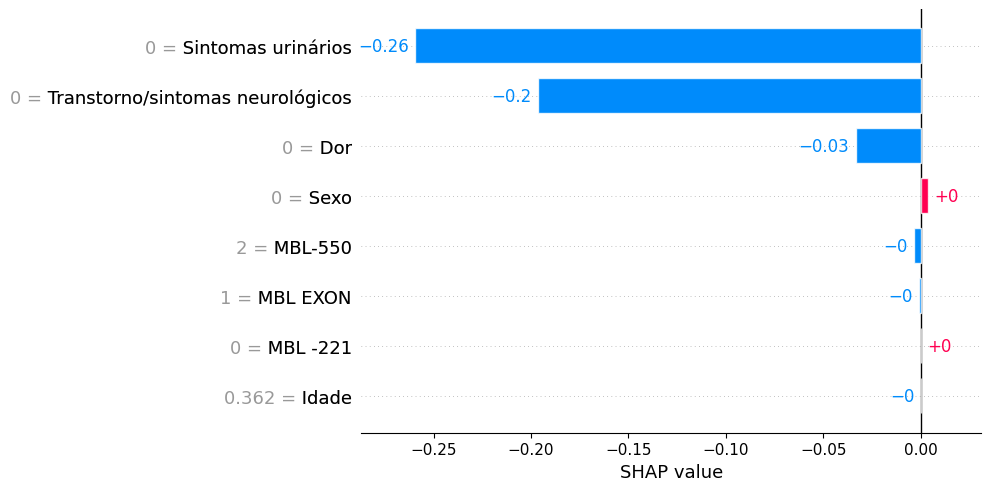

In [ ]:
# Training the classifiers
for item, nome in zip(classifiers, names):

    # Training model
    item.fit(X_train, y_train)

    for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
        X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

        # Create an explainer object
        explainer = shap.Explainer(item.predict, X_train_fold)

        # Calculate SHAP values
        shap_values = explainer(X_test_fold)
        # Plot SHAP summary plot
        print(f'Importância das Características do modelo {nome}')
        shap.plots.bar(shap_values)
    break